In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [4]:
# read your data
app_train = pd.read_csv('application_train.csv')

In [5]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [6]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
app_train.shape

(307511, 122)

In [8]:
# read your data
dic = pd.read_csv('HomeCredit_columns_deskripsi_application.csv').drop(['Unnamed: 0','Table', 'Special'],axis=1)

In [9]:
dic.head()

Row                                          Deskripsi
0          SK_ID_CURR                      ID pinjaman dalam sampel kami
1              TARGET  Variabel target (1 - klien dengan kesulitan pe...
2  NAME_CONTRACT_TYPE  Identifikasi apakah pinjaman bersifat tunai at...
3         CODE_GENDER                                Jenis kelamin klien
4        FLAG_OWN_CAR                   Tandai jika klien memiliki mobil

In [10]:
# mengganti nama columns pada dictionary
dic.rename(columns={'Row': 'columns'}, inplace=True)

In [11]:
dic.head()

columns                                          Deskripsi
0          SK_ID_CURR                      ID pinjaman dalam sampel kami
1              TARGET  Variabel target (1 - klien dengan kesulitan pe...
2  NAME_CONTRACT_TYPE  Identifikasi apakah pinjaman bersifat tunai at...
3         CODE_GENDER                                Jenis kelamin klien
4        FLAG_OWN_CAR                   Tandai jika klien memiliki mobil

## Explain Data

In [12]:
pd.set_option('max_colwidth',500)

In [13]:
# melihat ringkasan data
list_feature = []
for col in app_train:
    list_feature.append([col,
                      app_train[col].dtype,
                      app_train[col].isna().sum(),
                      round(100*app_train[col].isna().sum()/len(app_train[col]), 2),
                      app_train[col].nunique(),
                      app_train[col].unique()[:5]])

app_train_info = pd.DataFrame(data=list_feature, columns='columns, datatype, null_values, null_percentage, unique_values, unique_sample'.split(","))
app_train_info

columns  datatype   null_values   null_percentage  \
0                    SK_ID_CURR     int64             0               0.0   
1                        TARGET     int64             0               0.0   
2            NAME_CONTRACT_TYPE    object             0               0.0   
3                   CODE_GENDER    object             0               0.0   
4                  FLAG_OWN_CAR    object             0               0.0   
..                          ...       ...           ...               ...   
117   AMT_REQ_CREDIT_BUREAU_DAY   float64         41519              13.5   
118  AMT_REQ_CREDIT_BUREAU_WEEK   float64         41519              13.5   
119   AMT_REQ_CREDIT_BUREAU_MON   float64         41519              13.5   
120   AMT_REQ_CREDIT_BUREAU_QRT   float64         41519              13.5   
121  AMT_REQ_CREDIT_BUREAU_YEAR   float64         41519              13.5   

      unique_values                             unique_sample  
0            307511  [100002, 100003, 100004, 100006, 100007]  
1                 2                                    [1, 0]  
2                 2             [Cash loans, Revolving loans]  
3                 3                               [M, F, XNA]  
4                 2                                    [N, Y]  
..              ...                                       ...  
117               9                 [0.0, nan, 1.0, 3.0, 2.0]  
118               9                 [0.0, nan, 1.0, 3.0, 2.0]  
119              24                 [0.0, nan, 1.0, 2.0, 6.0]  
120              11                 [0.0, nan, 1.0, 2.0, 4.0]  
121              25                 [1.0, 0.0, nan, 2.0, 4.0]  

[122 rows x 6 columns]

In [14]:
app_train_col=app_train_info.merge(dic, on='columns',how='left')

In [15]:
app_train_col

columns  datatype   null_values   null_percentage  \
0                    SK_ID_CURR     int64             0               0.0   
1                        TARGET     int64             0               0.0   
2            NAME_CONTRACT_TYPE    object             0               0.0   
3                   CODE_GENDER    object             0               0.0   
4                  FLAG_OWN_CAR    object             0               0.0   
..                          ...       ...           ...               ...   
117   AMT_REQ_CREDIT_BUREAU_DAY   float64         41519              13.5   
118  AMT_REQ_CREDIT_BUREAU_WEEK   float64         41519              13.5   
119   AMT_REQ_CREDIT_BUREAU_MON   float64         41519              13.5   
120   AMT_REQ_CREDIT_BUREAU_QRT   float64         41519              13.5   
121  AMT_REQ_CREDIT_BUREAU_YEAR   float64         41519              13.5   

      unique_values                             unique_sample  \
0            307511  [100002, 100003, 100004, 100006, 100007]   
1                 2                                    [1, 0]   
2                 2             [Cash loans, Revolving loans]   
3                 3                               [M, F, XNA]   
4                 2                                    [N, Y]   
..              ...                                       ...   
117               9                 [0.0, nan, 1.0, 3.0, 2.0]   
118               9                 [0.0, nan, 1.0, 3.0, 2.0]   
119              24                 [0.0, nan, 1.0, 2.0, 6.0]   
120              11                 [0.0, nan, 1.0, 2.0, 4.0]   
121              25                 [1.0, 0.0, nan, 2.0, 4.0]   

                                                                                                                                                                                                              Deskripsi  
0                                                                                                                                                                                         ID pinjaman dalam sampel kami  
1    Variabel target (1 - klien dengan kesulitan pembayaran: dia mengalami keterlambatan pembayaran lebih dari X hari pada setidaknya satu dari angsuran Y pertama pinjaman dalam sampel kami, 0 - semua kasus lainnya)  
2                                                                                                                                                             Identifikasi apakah pinjaman bersifat tunai atau bergulir  
3                                                                                                                                                                                                   Jenis kelamin klien  
4                                                                                                                                                                                      Tandai jika klien memiliki mobil  
..                                                                                                                                                                                                                  ...  
117                                                                                            Jumlah pertanyaan ke Biro Kredit tentang klien satu hari sebelum permohonan (tidak termasuk satu jam sebelum permohonan)  
118                                                                                         Jumlah pertanyaan ke Biro Kredit tentang klien satu minggu sebelum permohonan (tidak termasuk satu hari sebelum permohonan)  
119                                                                                        Jumlah pertanyaan ke Biro Kredit tentang klien satu bulan sebelum permohonan (tidak termasuk satu minggu sebelum permohonan)  
120                                                                                            Jumlah pertanyaan ke Biro Kredit tentang kl

In [16]:
app_train_col[0:30]

columns  datatype   null_values   null_percentage  \
0                   SK_ID_CURR     int64             0              0.00   
1                       TARGET     int64             0              0.00   
2           NAME_CONTRACT_TYPE    object             0              0.00   
3                  CODE_GENDER    object             0              0.00   
4                 FLAG_OWN_CAR    object             0              0.00   
5              FLAG_OWN_REALTY    object             0              0.00   
6                 CNT_CHILDREN     int64             0              0.00   
7             AMT_INCOME_TOTAL   float64             0              0.00   
8                   AMT_CREDIT   float64             0              0.00   
9                  AMT_ANNUITY   float64            12              0.00   
10             AMT_GOODS_PRICE   float64           278              0.09   
11             NAME_TYPE_SUITE    object          1292              0.42   
12            NAME_INCOME_TYPE    object             0              0.00   
13         NAME_EDUCATION_TYPE    object             0              0.00   
14          NAME_FAMILY_STATUS    object             0              0.00   
15           NAME_HOUSING_TYPE    object             0              0.00   
16  REGION_POPULATION_RELATIVE   float64             0              0.00   
17                  DAYS_BIRTH     int64             0              0.00   
18               DAYS_EMPLOYED     int64             0              0.00   
19           DAYS_REGISTRATION   float64             0              0.00   
20             DAYS_ID_PUBLISH     int64             0              0.00   
21                 OWN_CAR_AGE   float64        202929             65.99   
22                  FLAG_MOBIL     int64             0              0.00   
23              FLAG_EMP_PHONE     int64             0              0.00   
24             FLAG_WORK_PHONE     int64             0              0.00   
25            FLAG_CONT_MOBILE     int64             0              0.00   
26                  FLAG_PHONE     int64             0              0.00   
27                  FLAG_EMAIL     int64             0              0.00   
28             OCCUPATION_TYPE    object         96391             31.35   
29             CNT_FAM_MEMBERS   float64             2              0.00   

     unique_values  \
0           307511   
1                2   
2                2   
3                3   
4                2   
5                2   
6               15   
7             2548   
8             5603   
9            13672   
10            1002   
11               7   
12               8   
13               5   
14               6   
15               6   
16              81   
17           17460   
18           12574   
19           15688   
20            6168   
21              62   
22               2   
23               2   
24               2   
25               2   
26               2   
27               2   
28              18   
29              17   

                                                                                             unique_sample  \
0                                                                 [100002, 100003, 100004, 100006, 100007]   
1                                                                                                   [1, 0]   
2                                                                            [Cash loans, Revolving loans]   
3                                                                                              [M, F, XNA]   
4                                                                                                   [N, Y]   
5                                                                                                   [Y, N]   
6                                                                                          [0, 1, 2, 3, 4]   
7                                                        [202500.0, 270000.0, 67500.0, 135000.0, 121500

In [17]:
app_train_col[30:60]

columns  datatype   null_values   null_percentage  \
30         REGION_RATING_CLIENT     int64             0              0.00   
31  REGION_RATING_CLIENT_W_CITY     int64             0              0.00   
32   WEEKDAY_APPR_PROCESS_START    object             0              0.00   
33      HOUR_APPR_PROCESS_START     int64             0              0.00   
34   REG_REGION_NOT_LIVE_REGION     int64             0              0.00   
35   REG_REGION_NOT_WORK_REGION     int64             0              0.00   
36  LIVE_REGION_NOT_WORK_REGION     int64             0              0.00   
37       REG_CITY_NOT_LIVE_CITY     int64             0              0.00   
38       REG_CITY_NOT_WORK_CITY     int64             0              0.00   
39      LIVE_CITY_NOT_WORK_CITY     int64             0              0.00   
40            ORGANIZATION_TYPE    object             0              0.00   
41                 EXT_SOURCE_1   float64        173378             56.38   
42                 EXT_SOURCE_2   float64           660              0.21   
43                 EXT_SOURCE_3   float64         60965             19.83   
44               APARTMENTS_AVG   float64        156061             50.75   
45             BASEMENTAREA_AVG   float64        179943             58.52   
46  YEARS_BEGINEXPLUATATION_AVG   float64        150007             48.78   
47              YEARS_BUILD_AVG   float64        204488             66.50   
48               COMMONAREA_AVG   float64        214865             69.87   
49                ELEVATORS_AVG   float64        163891             53.30   
50                ENTRANCES_AVG   float64        154828             50.35   
51                FLOORSMAX_AVG   float64        153020             49.76   
52                FLOORSMIN_AVG   float64        208642             67.85   
53                 LANDAREA_AVG   float64        182590             59.38   
54         LIVINGAPARTMENTS_AVG   float64        210199             68.35   
55               LIVINGAREA_AVG   float64        154350             50.19   
56      NONLIVINGAPARTMENTS_AVG   float64        213514             69.43   
57            NONLIVINGAREA_AVG   float64        169682             55.18   
58              APARTMENTS_MODE   float64        156061             50.75   
59            BASEMENTAREA_MODE   float64        179943             58.52   

     unique_values  \
30               3   
31               3   
32               7   
33              24   
34               2   
35               2   
36               2   
37               2   
38               2   
39               2   
40              58   
41          114584   
42          119831   
43             814   
44            2339   
45            3780   
46             285   
47             149   
48            3181   
49             257   
50             285   
51             403   
52             305   
53            3527   
54            1868   
55            5199   
56             386   
57            3290   
58             760   
59            3841   

                                                                                           unique_sample  \
30                                                                                             [2, 1, 3]   
31                                                                                             [2, 1, 3]   
32                                                       [WEDNESDAY, MONDAY, THURSDAY, SUNDAY, SATURDAY]   
33                                                                                   [10, 11, 9, 17, 16]   
34                                                                                                [0, 1]   
35                                                                                                [0, 1]   
36                                                                                                [0, 1]   
37                                                                                       

In [18]:
app_train_col[60:90]

columns  datatype   null_values   null_percentage  \
60  YEARS_BEGINEXPLUATATION_MODE   float64        150007             48.78   
61              YEARS_BUILD_MODE   float64        204488             66.50   
62               COMMONAREA_MODE   float64        214865             69.87   
63                ELEVATORS_MODE   float64        163891             53.30   
64                ENTRANCES_MODE   float64        154828             50.35   
65                FLOORSMAX_MODE   float64        153020             49.76   
66                FLOORSMIN_MODE   float64        208642             67.85   
67                 LANDAREA_MODE   float64        182590             59.38   
68         LIVINGAPARTMENTS_MODE   float64        210199             68.35   
69               LIVINGAREA_MODE   float64        154350             50.19   
70      NONLIVINGAPARTMENTS_MODE   float64        213514             69.43   
71            NONLIVINGAREA_MODE   float64        169682             55.18   
72               APARTMENTS_MEDI   float64        156061             50.75   
73             BASEMENTAREA_MEDI   float64        179943             58.52   
74  YEARS_BEGINEXPLUATATION_MEDI   float64        150007             48.78   
75              YEARS_BUILD_MEDI   float64        204488             66.50   
76               COMMONAREA_MEDI   float64        214865             69.87   
77                ELEVATORS_MEDI   float64        163891             53.30   
78                ENTRANCES_MEDI   float64        154828             50.35   
79                FLOORSMAX_MEDI   float64        153020             49.76   
80                FLOORSMIN_MEDI   float64        208642             67.85   
81                 LANDAREA_MEDI   float64        182590             59.38   
82         LIVINGAPARTMENTS_MEDI   float64        210199             68.35   
83               LIVINGAREA_MEDI   float64        154350             50.19   
84      NONLIVINGAPARTMENTS_MEDI   float64        213514             69.43   
85            NONLIVINGAREA_MEDI   float64        169682             55.18   
86            FONDKAPREMONT_MODE    object        210295             68.39   
87                HOUSETYPE_MODE    object        154297             50.18   
88                TOTALAREA_MODE   float64        148431             48.27   
89            WALLSMATERIAL_MODE    object        156341             50.84   

     unique_values  \
60             221   
61             154   
62            3128   
63              26   
64              30   
65              25   
66              25   
67            3563   
68             736   
69            5301   
70             167   
71            3327   
72            1148   
73            3772   
74             245   
75             151   
76            3202   
77              46   
78              46   
79              49   
80              47   
81            3560   
82            1097   
83            5281   
84             214   
85            3323   
86               4   
87               3   
88            5116   
89               7   

                                                                      unique_sample  \
60                                            [0.9722, 0.9851, nan, 0.9811, 0.9806]   
61                                             [0.6341, 0.804, nan, 0.7452, 0.9804]   
62                                            [0.0144, 0.0497, nan, 0.0587, 0.1153]   
63                                               [0.0, 0.0806, nan, 0.1611, 0.4028]   
64                                             [0.069, 0.0345, nan, 0.2069, 0.1379]   
65                                            [0.0833, 0.2917, nan, 0.1667, 0.3333]   
66                                              [0.125, 0.3333, nan, 0.375, 0.7083]   
67                                            [0.0377, 0.0128, nan, 0.0138, 0.0952]   
68                                              [0.022, 0.079, nan, 0.1313, 0.3113]   
69                                             [0.019

In [19]:
app_train_col[90:122]

columns  datatype   null_values   null_percentage  \
90          EMERGENCYSTATE_MODE    object        145755             47.40   
91     OBS_30_CNT_SOCIAL_CIRCLE   float64          1021              0.33   
92     DEF_30_CNT_SOCIAL_CIRCLE   float64          1021              0.33   
93     OBS_60_CNT_SOCIAL_CIRCLE   float64          1021              0.33   
94     DEF_60_CNT_SOCIAL_CIRCLE   float64          1021              0.33   
95       DAYS_LAST_PHONE_CHANGE   float64             1              0.00   
96              FLAG_DOCUMENT_2     int64             0              0.00   
97              FLAG_DOCUMENT_3     int64             0              0.00   
98              FLAG_DOCUMENT_4     int64             0              0.00   
99              FLAG_DOCUMENT_5     int64             0              0.00   
100             FLAG_DOCUMENT_6     int64             0              0.00   
101             FLAG_DOCUMENT_7     int64             0              0.00   
102             FLAG_DOCUMENT_8     int64             0              0.00   
103             FLAG_DOCUMENT_9     int64             0              0.00   
104            FLAG_DOCUMENT_10     int64             0              0.00   
105            FLAG_DOCUMENT_11     int64             0              0.00   
106            FLAG_DOCUMENT_12     int64             0              0.00   
107            FLAG_DOCUMENT_13     int64             0              0.00   
108            FLAG_DOCUMENT_14     int64             0              0.00   
109            FLAG_DOCUMENT_15     int64             0              0.00   
110            FLAG_DOCUMENT_16     int64             0              0.00   
111            FLAG_DOCUMENT_17     int64             0              0.00   
112            FLAG_DOCUMENT_18     int64             0              0.00   
113            FLAG_DOCUMENT_19     int64             0              0.00   
114            FLAG_DOCUMENT_20     int64             0              0.00   
115            FLAG_DOCUMENT_21     int64             0              0.00   
116  AMT_REQ_CREDIT_BUREAU_HOUR   float64         41519             13.50   
117   AMT_REQ_CREDIT_BUREAU_DAY   float64         41519             13.50   
118  AMT_REQ_CREDIT_BUREAU_WEEK   float64         41519             13.50   
119   AMT_REQ_CREDIT_BUREAU_MON   float64         41519             13.50   
120   AMT_REQ_CREDIT_BUREAU_QRT   float64         41519             13.50   
121  AMT_REQ_CREDIT_BUREAU_YEAR   float64         41519             13.50   

      unique_values                               unique_sample  \
90                2                              [No, nan, Yes]   
91               33                   [2.0, 1.0, 0.0, 4.0, 8.0]   
92               10                   [2.0, 0.0, 1.0, nan, 3.0]   
93               33                   [2.0, 1.0, 0.0, 4.0, 8.0]   
94                9                   [2.0, 0.0, 1.0, nan, 3.0]   
95             3773  [-1134.0, -828.0, -815.0, -617.0, -1106.0]   
96                2                                      [0, 1]   
97                2                                      [1, 0]   
98                2                                      [0, 1]   
99                2                                      [0, 1]   
100               2                                      [0, 1]   
101               2                                      [0, 1]   
102               2                                      [0, 1]   
103               2                                      [0, 1]   
104               2                                      [0, 1]   
105               2                                      [0, 1]   
106               2                                      [0, 1]   
107               2                                      [0, 1]   
108               2                                      [0, 1]   
109               2                                      [0, 1]   
110               2                                      [0, 1]   
111     

# EDA

## Target

In [17]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [18]:
TARGET_counts = app_train['TARGET'].value_counts()

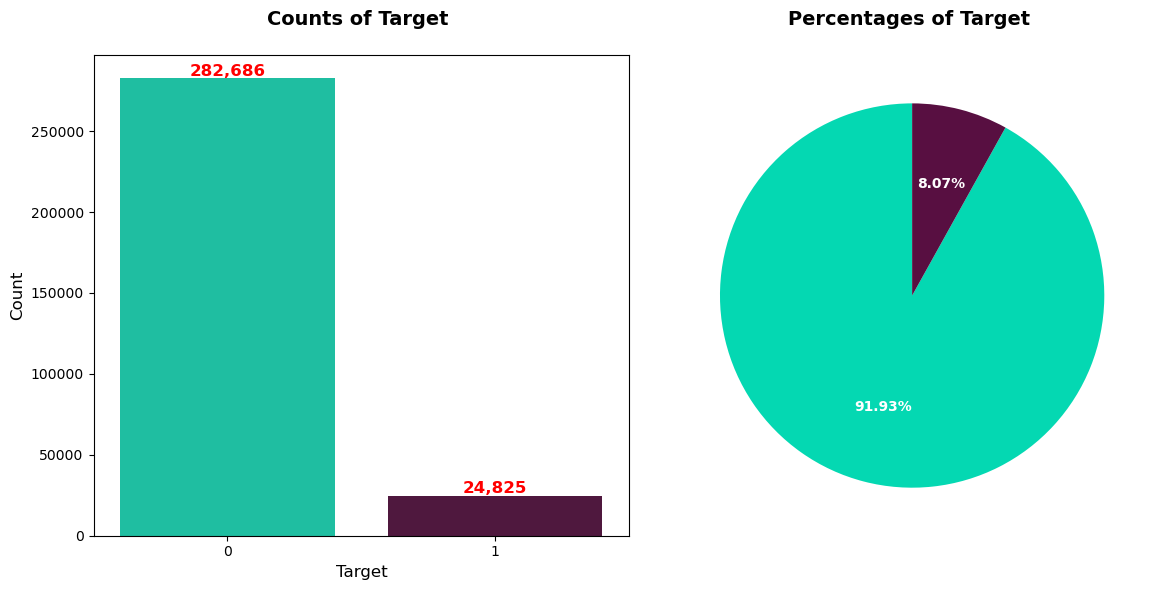

In [80]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(x=TARGET_counts.index, y=TARGET_counts, palette=['#04D8B2', '#580F41'])
for i, v in enumerate(TARGET_counts):
    bar_height = ax.patches[i].get_height()
    text_pos = bar_height - 180
    ax.text(i, text_pos, f'{v:,}', ha='center', va='bottom', fontsize=12, color='Red', fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.title('Counts of Target \n', fontsize=14, fontweight='bold')

percentages = TARGET_counts / TARGET_counts.sum() * 100

plt.subplot(1, 2, 2)
plt.pie(percentages, labels=percentages.index, autopct='%1.2f%%', colors=['#04D8B2', '#580F41'], startangle=90,textprops={'color': 'white', 'fontweight':'bold'})
plt.title('Percentages of Target \n', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Tipe Gender

In [79]:
app_train['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [80]:
gender_type = app_train['CODE_GENDER'].value_counts()

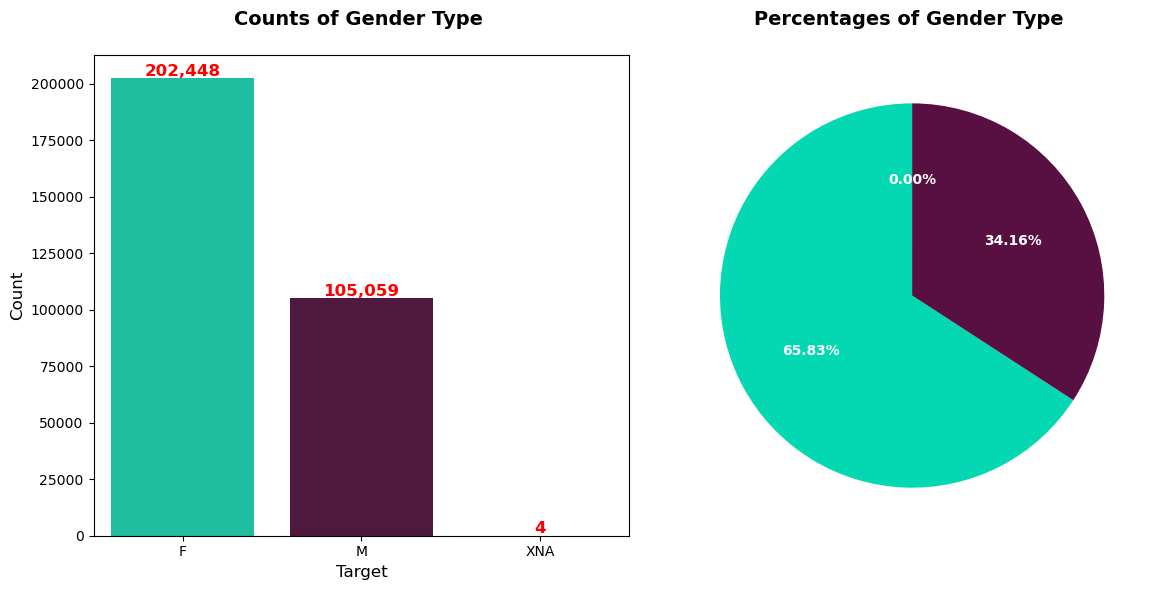

In [81]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(x=gender_type.index, y=gender_type, palette=['#04D8B2', '#580F41'])
for i, v in enumerate(gender_type):
    bar_height = ax.patches[i].get_height()
    text_pos = bar_height - 180
    ax.text(i, text_pos, f'{v:,}', ha='center', va='bottom', fontsize=12, color='Red', fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.title('Counts of Gender Type \n', fontsize=14, fontweight='bold')

percentages = gender_type / gender_type.sum() * 100

plt.subplot(1, 2, 2)
plt.pie(percentages, labels=percentages.index, autopct='%1.2f%%', colors=['#04D8B2', '#580F41'], startangle=90,textprops={'color': 'white', 'fontweight':'bold'})
plt.title('Percentages of Gender Type \n', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Tipe Pinjaman

In [58]:
app_train['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [59]:
contract_type = app_train['NAME_CONTRACT_TYPE'].value_counts()

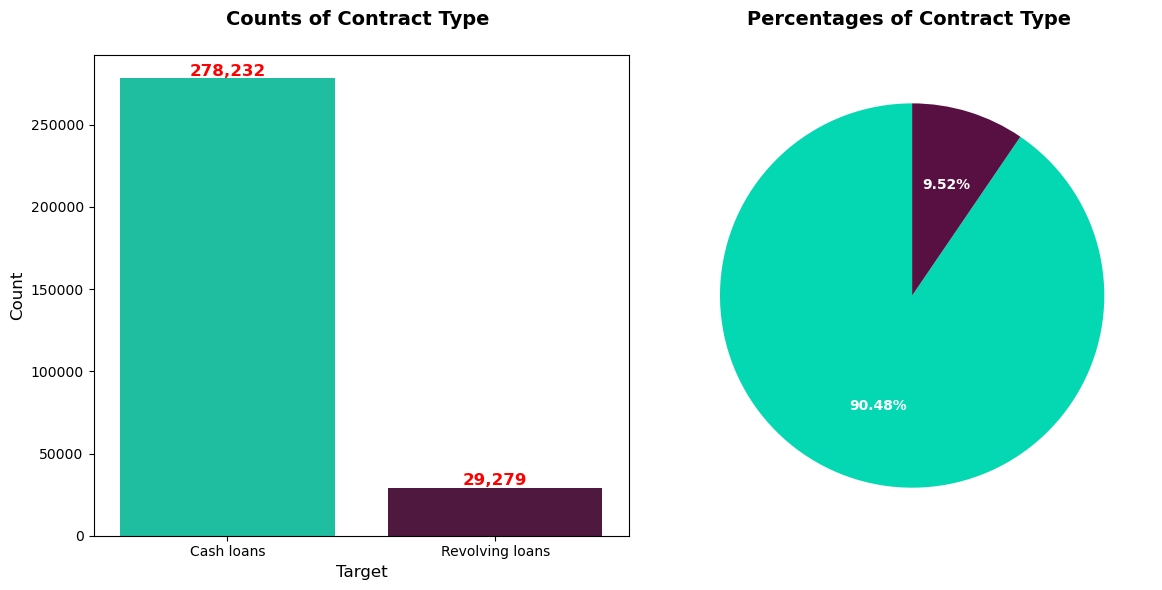

In [60]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(x=contract_type.index, y=contract_type, palette=['#04D8B2', '#580F41'])
for i, v in enumerate(contract_type):
    bar_height = ax.patches[i].get_height()
    text_pos = bar_height - 180
    ax.text(i, text_pos, f'{v:,}', ha='center', va='bottom', fontsize=12, color='Red', fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.title('Counts of Contract Type \n', fontsize=14, fontweight='bold')

percentages = contract_type / contract_type.sum() * 100

plt.subplot(1, 2, 2)
plt.pie(percentages, labels=percentages.index, autopct='%1.2f%%', colors=['#04D8B2', '#580F41'], startangle=90,textprops={'color': 'white', 'fontweight':'bold'})
plt.title('Percentages of Contract Type \n', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Tipe Pendapatan

In [23]:
app_train['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [25]:
income_type = app_train['NAME_INCOME_TYPE'].value_counts()

In [30]:
income_type

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

Text(0.5, 1.0, 'Counts of Income Type \n')

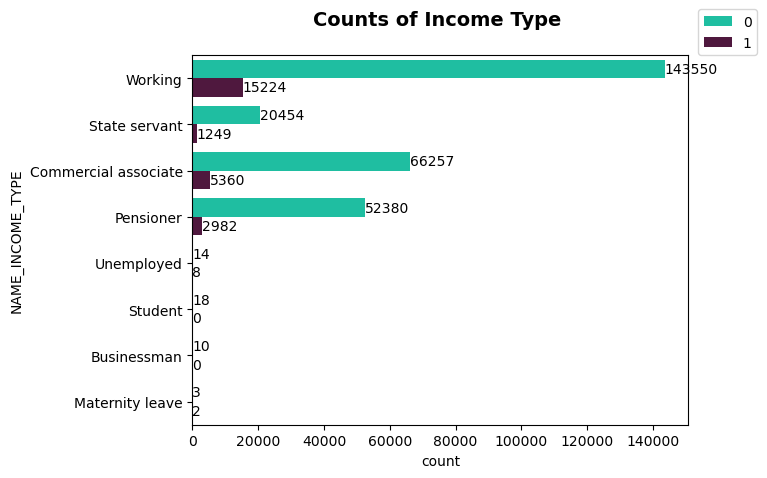

In [45]:
ax = sns.countplot(data=app_train, y='NAME_INCOME_TYPE', hue='TARGET', palette=['#04D8B2', '#580F41'])
for cont in ax.containers:
  ax.bar_label(cont)
plt.legend(bbox_to_anchor=(1.02, 1), loc='lower left', borderaxespad=0.)
plt.title('Counts of Income Type \n', fontsize=14, fontweight='bold')


In [36]:
income_type = app_train.groupby(['NAME_INCOME_TYPE', 'TARGET'])['AMT_INCOME_TOTAL'].count().reset_index()

In [37]:
def calculate_ratio(group):
  total_income = group['AMT_INCOME_TOTAL'].sum()
  group['ratio'] = round(group['AMT_INCOME_TOTAL'] / total_income * 100, 0).astype(int)
  return group

income_type = income_type.groupby('NAME_INCOME_TYPE').apply(calculate_ratio)

In [38]:
income_type

NAME_INCOME_TYPE  TARGET  AMT_INCOME_TOTAL  ratio
NAME_INCOME_TYPE                                                              
Businessman          0            Businessman       0                10    100
Commercial associate 1   Commercial associate       0             66257     93
                     2   Commercial associate       1              5360      7
Maternity leave      3        Maternity leave       0                 3     60
                     4        Maternity leave       1                 2     40
Pensioner            5              Pensioner       0             52380     95
                     6              Pensioner       1              2982      5
State servant        7          State servant       0             20454     94
                     8          State servant       1              1249      6
Student              9                Student       0                18    100
Unemployed           10            Unemployed       0                14     64
                     11            Unemployed       1                 8     36
Working              12               Working       0            143550     90
                     13               Working       1             15224     10

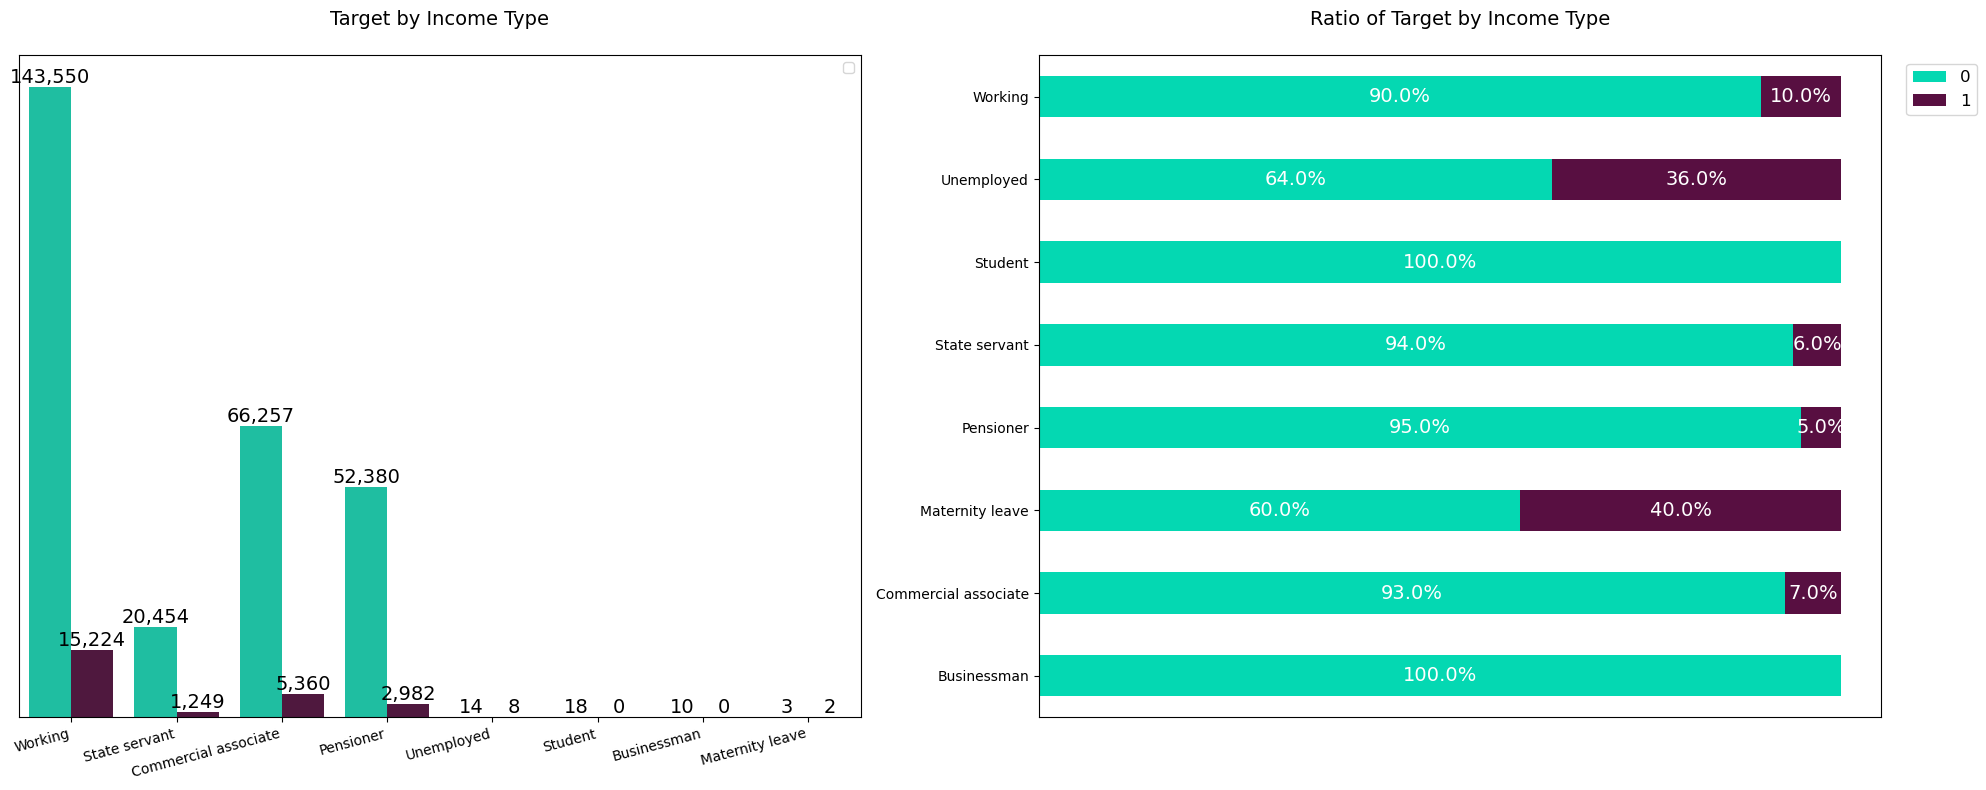

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Target by Income Type\n', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data=app_train, hue='TARGET', palette=['#04D8B2', '#580F41'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 30
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='bottom', fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=15, ha='right')
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Target by Income Type\n', fontsize=14)
income_type.pivot(index='NAME_INCOME_TYPE', columns='TARGET', values='ratio').plot(kind='barh', stacked=True, color=['#04D8B2', '#580F41'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14, color='white')
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()

## Pendidikan Terakhir

In [26]:
app_train['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [47]:
education_type = app_train['NAME_EDUCATION_TYPE'].value_counts()

Text(0.5, 1.0, 'Counts of Education Type \n')

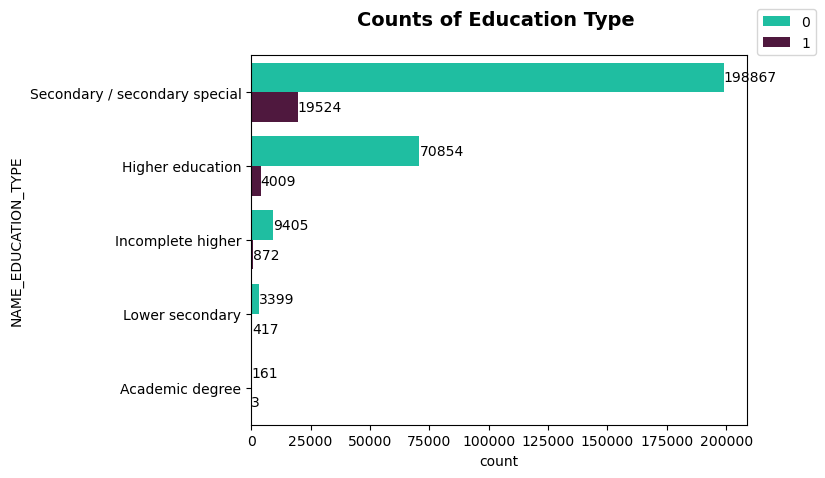

In [48]:
ax = sns.countplot(data=app_train, y='NAME_EDUCATION_TYPE', hue='TARGET', palette=['#04D8B2', '#580F41'])
for cont in ax.containers:
  ax.bar_label(cont)
plt.legend(bbox_to_anchor=(1.02, 1), loc='lower left', borderaxespad=0.)
plt.title('Counts of Education Type \n', fontsize=14, fontweight='bold')

In [49]:
education_type = app_train.groupby(['NAME_EDUCATION_TYPE', 'TARGET'])['AMT_INCOME_TOTAL'].count().reset_index()

In [50]:
def calculate_ratio(group):
  total_income = group['AMT_INCOME_TOTAL'].sum()
  group['ratio'] = round(group['AMT_INCOME_TOTAL'] / total_income * 100, 0).astype(int)
  return group

education_type = education_type.groupby('NAME_EDUCATION_TYPE').apply(calculate_ratio)

In [51]:
education_type

NAME_EDUCATION_TYPE  TARGET  \
NAME_EDUCATION_TYPE                                                      
Academic degree               0                Academic degree       0   
                              1                Academic degree       1   
Higher education              2               Higher education       0   
                              3               Higher education       1   
Incomplete higher             4              Incomplete higher       0   
                              5              Incomplete higher       1   
Lower secondary               6                Lower secondary       0   
                              7                Lower secondary       1   
Secondary / secondary special 8  Secondary / secondary special       0   
                              9  Secondary / secondary special       1   

                                 AMT_INCOME_TOTAL  ratio  
NAME_EDUCATION_TYPE                                       
Academic degree               0               161     98  
                              1                 3      2  
Higher education              2             70854     95  
                              3              4009      5  
Incomplete higher             4              9405     92  
                              5               872      8  
Lower secondary               6              3399     89  
                              7               417     11  
Secondary / secondary special 8            198867     91  
                              9             19524      9

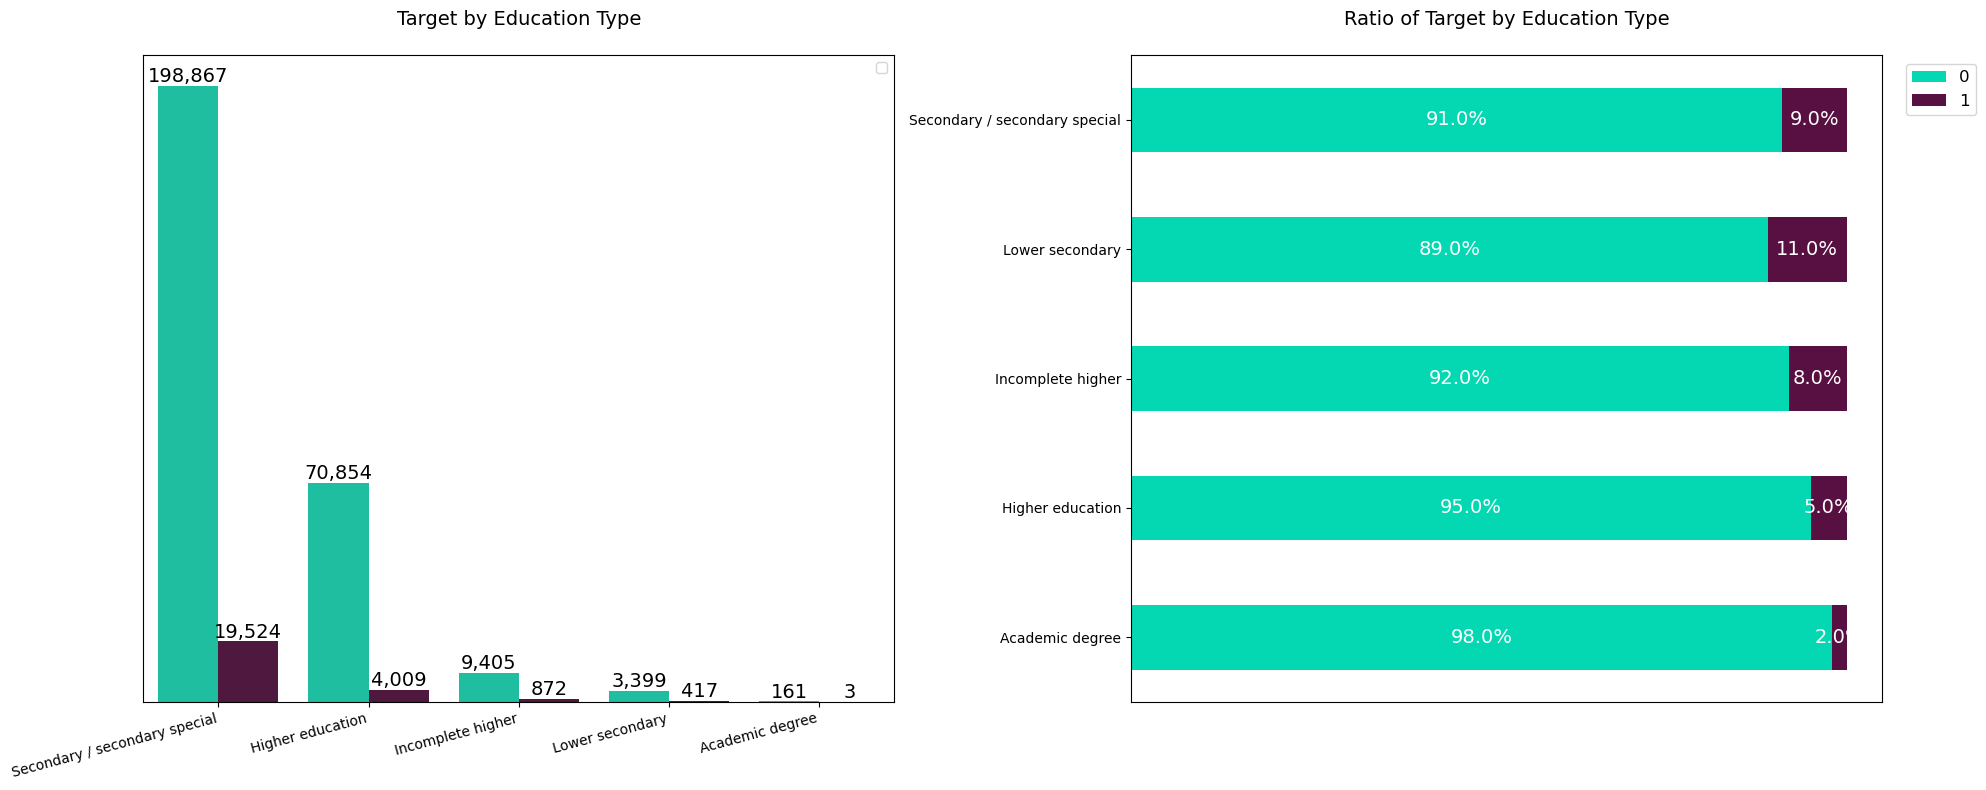

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Target by Education Type\n', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data=app_train, hue='TARGET', palette=['#04D8B2', '#580F41'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 30
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='bottom', fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=15, ha='right')
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Target by Education Type\n', fontsize=14)
education_type.pivot(index='NAME_EDUCATION_TYPE', columns='TARGET', values='ratio').plot(kind='barh', stacked=True, color=['#04D8B2', '#580F41'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14, color='white')
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()

## Status Keluarga

In [61]:
app_train['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Counts of Family Status \n')

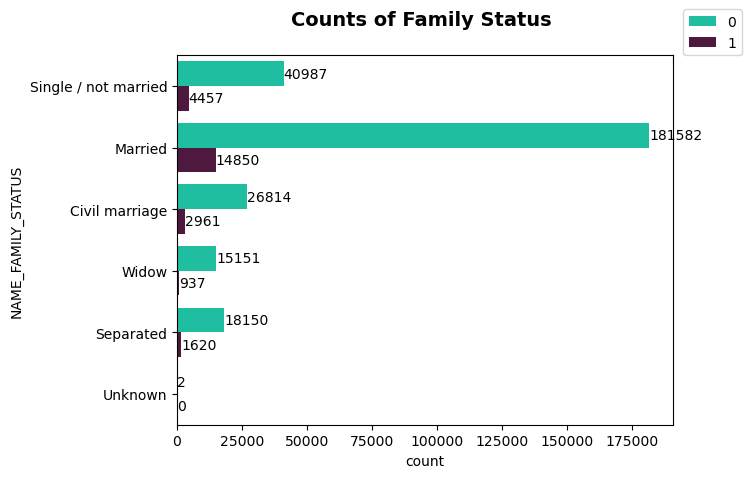

In [62]:
ax = sns.countplot(data=app_train, y='NAME_FAMILY_STATUS', hue='TARGET', palette=['#04D8B2', '#580F41'])
for cont in ax.containers:
  ax.bar_label(cont)
plt.legend(bbox_to_anchor=(1.02, 1), loc='lower left', borderaxespad=0.)
plt.title('Counts of Family Status \n', fontsize=14, fontweight='bold')

In [63]:
married_type = app_train['NAME_FAMILY_STATUS'].value_counts()
married_type

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [64]:
married_type = app_train.groupby(['NAME_FAMILY_STATUS', 'TARGET'])['AMT_INCOME_TOTAL'].count().reset_index()

In [65]:
def calculate_ratio(group):
  total_income = group['AMT_INCOME_TOTAL'].sum()
  group['ratio'] = round(group['AMT_INCOME_TOTAL'] / total_income * 100, 0).astype(int)
  return group

married_type = married_type.groupby('NAME_FAMILY_STATUS').apply(calculate_ratio)

In [66]:
married_type

NAME_FAMILY_STATUS  TARGET  AMT_INCOME_TOTAL  ratio
NAME_FAMILY_STATUS                                                            
Civil marriage       0         Civil marriage       0             26814     90
                     1         Civil marriage       1              2961     10
Married              2                Married       0            181582     92
                     3                Married       1             14850      8
Separated            4              Separated       0             18150     92
                     5              Separated       1              1620      8
Single / not married 6   Single / not married       0             40987     90
                     7   Single / not married       1              4457     10
Unknown              8                Unknown       0                 2    100
Widow                9                  Widow       0             15151     94
                     10                 Widow       1               937      6

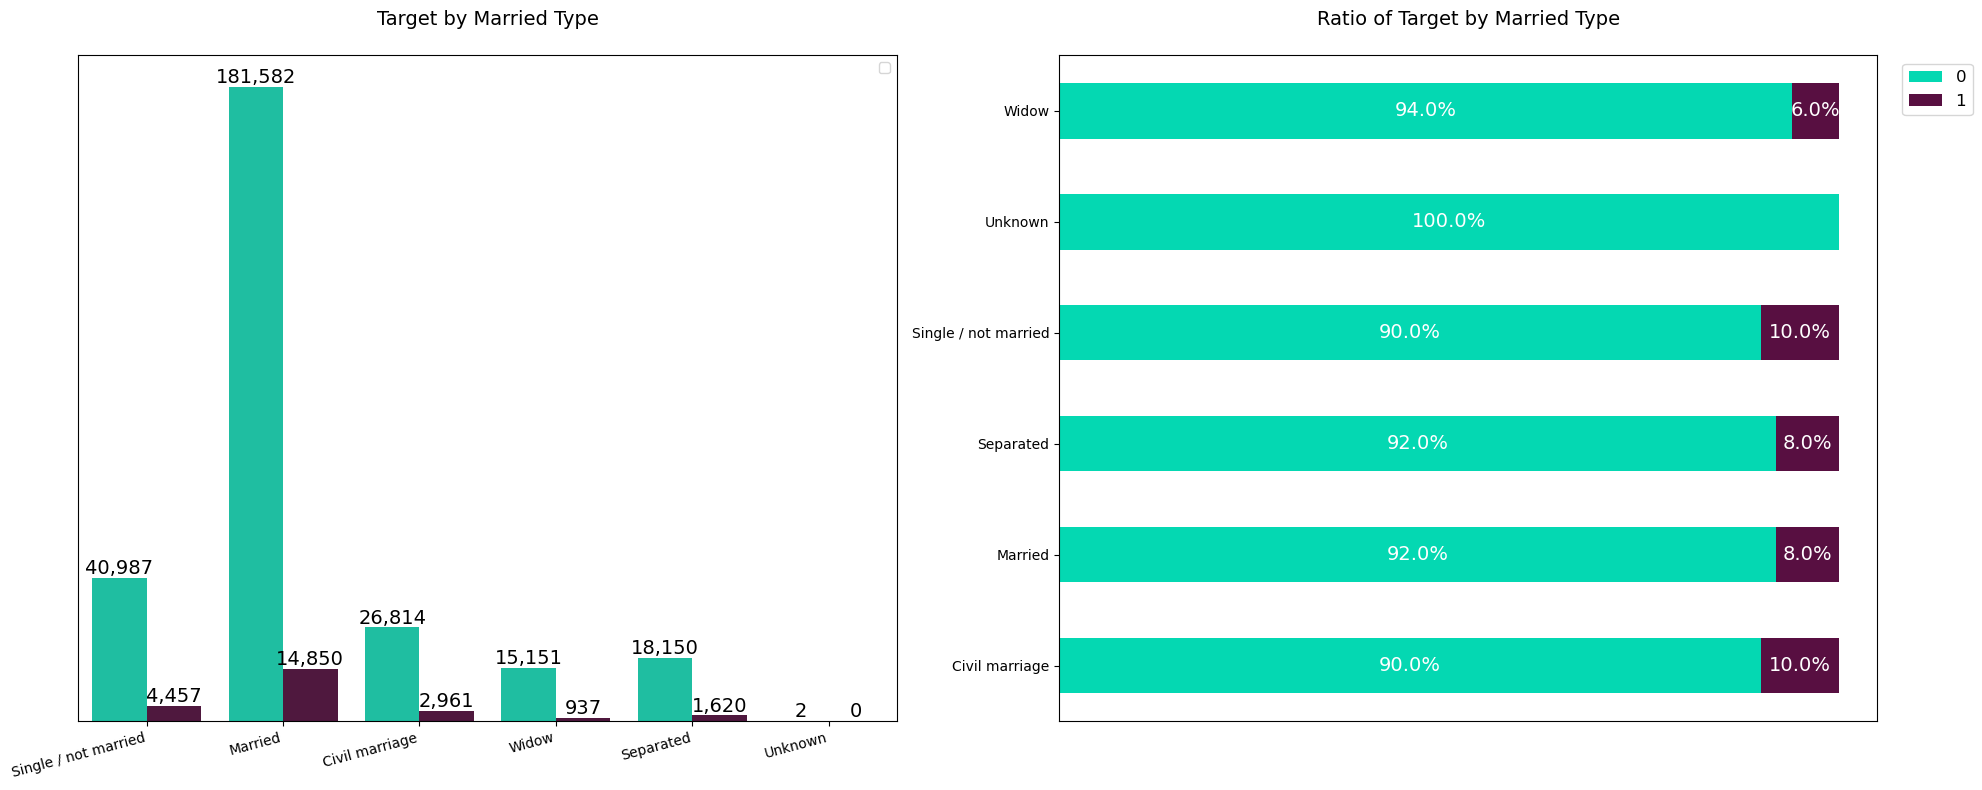

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Target by Married Type\n', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data=app_train, hue='TARGET', palette=['#04D8B2', '#580F41'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 30
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='bottom', fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=15, ha='right')
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Target by Married Type\n', fontsize=14)
married_type.pivot(index='NAME_FAMILY_STATUS', columns='TARGET', values='ratio').plot(kind='barh', stacked=True, color=['#04D8B2', '#580F41'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14, color='white')
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()

## Tipe Rumah

In [68]:
app_train['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

Text(0.5, 1.0, 'Counts of Family Status \n')

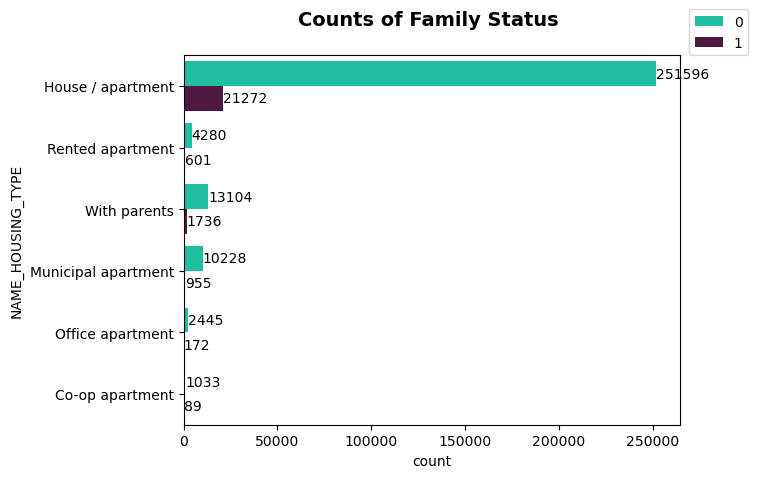

In [69]:
ax = sns.countplot(data=app_train, y='NAME_HOUSING_TYPE', hue='TARGET', palette=['#04D8B2', '#580F41'])
for cont in ax.containers:
  ax.bar_label(cont)
plt.legend(bbox_to_anchor=(1.02, 1), loc='lower left', borderaxespad=0.)
plt.title('Counts of Family Status \n', fontsize=14, fontweight='bold')

In [70]:
house_type = app_train['NAME_HOUSING_TYPE'].value_counts()
house_type

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

In [71]:
house_type = app_train.groupby(['NAME_HOUSING_TYPE', 'TARGET'])['AMT_INCOME_TOTAL'].count().reset_index()

In [72]:
def calculate_ratio(group):
  total_income = group['AMT_INCOME_TOTAL'].sum()
  group['ratio'] = round(group['AMT_INCOME_TOTAL'] / total_income * 100, 0).astype(int)
  return group

house_type = house_type.groupby('NAME_HOUSING_TYPE').apply(calculate_ratio)

In [73]:
house_type

NAME_HOUSING_TYPE  TARGET  AMT_INCOME_TOTAL  ratio
NAME_HOUSING_TYPE                                                           
Co-op apartment     0       Co-op apartment       0              1033     92
                    1       Co-op apartment       1                89      8
House / apartment   2     House / apartment       0            251596     92
                    3     House / apartment       1             21272      8
Municipal apartment 4   Municipal apartment       0             10228     91
                    5   Municipal apartment       1               955      9
Office apartment    6      Office apartment       0              2445     93
                    7      Office apartment       1               172      7
Rented apartment    8      Rented apartment       0              4280     88
                    9      Rented apartment       1               601     12
With parents        10         With parents       0             13104     88
                    11         With parents       1              1736     12

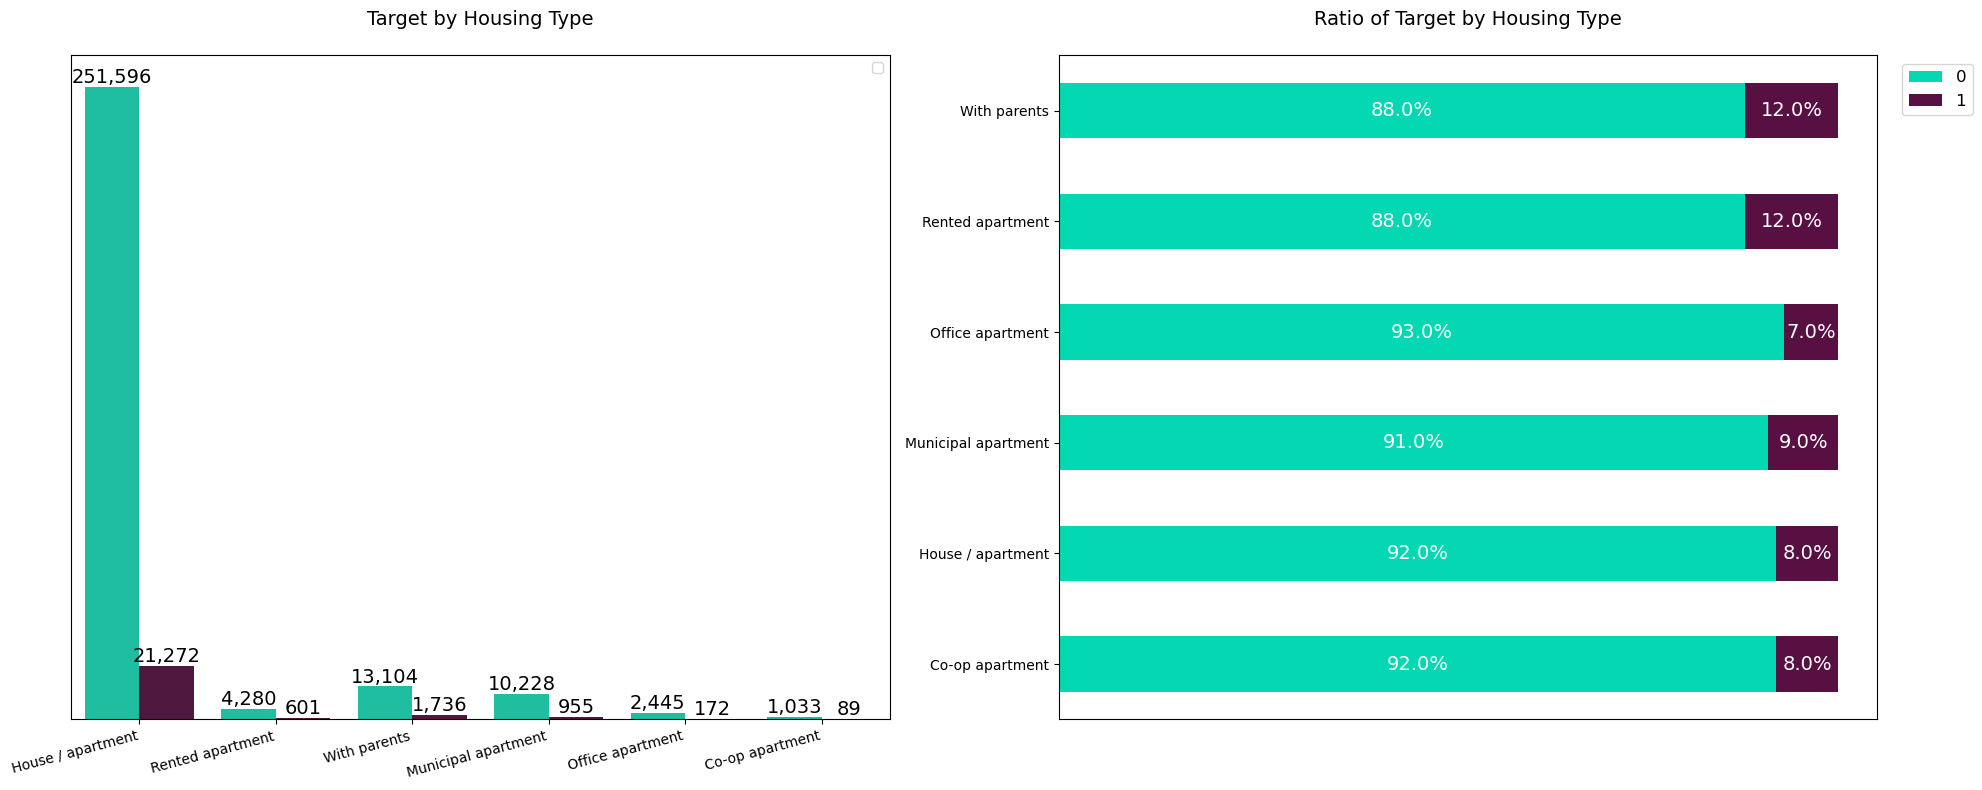

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].set_title('Target by Housing Type\n', fontsize=14)
sns.countplot(x='NAME_HOUSING_TYPE', data=app_train, hue='TARGET', palette=['#04D8B2', '#580F41'], ax=ax[0])
for i, container in enumerate(ax[0].containers):
    for bar in container:
        bar_height = bar.get_height()
        text_pos = bar_height - 30
        ax[0].annotate(f'{int(bar_height):,}', (bar.get_x() + bar.get_width() / 2, text_pos), ha='center', va='bottom', fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=15, ha='right')
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend([])

ax[1].set_title('Ratio of Target by Housing Type\n', fontsize=14)
house_type.pivot(index='NAME_HOUSING_TYPE', columns='TARGET', values='ratio').plot(kind='barh', stacked=True, color=['#04D8B2', '#580F41'], ax=ax[1])
for p in ax[1].patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width != 0:
        ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=14, color='white')
ax[1].set_xticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='12')

plt.tight_layout()
plt.show()

In [77]:
app_train['WEEKDAY_APPR_PROCESS_START'].value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64

# Data Cleaning

In [19]:

# Asumsikan df adalah DataFrame Anda
threshold = 0.10  # 10% threshold

# Hitung persentase missing value untuk setiap kolom
missing_percentage = app_train.isnull().mean()

# Identifikasi kolom-kolom dengan missing value lebih dari threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

In [20]:
columns_to_drop

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMEN

In [21]:
app_train_cleaned = app_train.drop(columns=columns_to_drop)

In [22]:
app_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [23]:
app_train_cleaned

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                     0                0                0                 0   
1                     0                0                0                 0   
2                     0                0                0                 0   
3                     0                0                0                 0   
4                     0                0                0                 0   
...                 ...              ...              ...               ...   
307506                0                0                0                 0   
307507                0                0                0                 0   
307508                0                0                0                 0   
307509                0                0                0                 0   
307510                0                0                0                 0   

        FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                      0                 0                 0  
1                      0                 0                 0  
2                      0                 0                 0  
3                      0                 0                 0  
4                      0                 0           

In [24]:
list_feature = []
for col in app_train_cleaned:
    list_feature.append([col, app_train_cleaned[col].dtype, app_train_cleaned[col].isna().sum(), app_train_cleaned[col].nunique(),app_train_cleaned[col].unique()[:5]])

app_train_info = pd.DataFrame(data=list_feature, columns='columns, datatype, null_values, unique_values, unique_sample'.split(","))
app_train_info

columns  datatype   null_values   unique_values  \
0           SK_ID_CURR     int64             0          307511   
1               TARGET     int64             0               2   
2   NAME_CONTRACT_TYPE    object             0               2   
3          CODE_GENDER    object             0               3   
4         FLAG_OWN_CAR    object             0               2   
..                 ...       ...           ...             ...   
60    FLAG_DOCUMENT_17     int64             0               2   
61    FLAG_DOCUMENT_18     int64             0               2   
62    FLAG_DOCUMENT_19     int64             0               2   
63    FLAG_DOCUMENT_20     int64             0               2   
64    FLAG_DOCUMENT_21     int64             0               2   

                               unique_sample  
0   [100002, 100003, 100004, 100006, 100007]  
1                                     [1, 0]  
2              [Cash loans, Revolving loans]  
3                                [M, F, XNA]  
4                                     [N, Y]  
..                                       ...  
60                                    [0, 1]  
61                                    [0, 1]  
62                                    [0, 1]  
63                                    [0, 1]  
64                                    [0, 1]  

[65 rows x 5 columns]

In [25]:
app_train_info[0:35]

columns  datatype   null_values   unique_values  \
0                    SK_ID_CURR     int64             0          307511   
1                        TARGET     int64             0               2   
2            NAME_CONTRACT_TYPE    object             0               2   
3                   CODE_GENDER    object             0               3   
4                  FLAG_OWN_CAR    object             0               2   
5               FLAG_OWN_REALTY    object             0               2   
6                  CNT_CHILDREN     int64             0              15   
7              AMT_INCOME_TOTAL   float64             0            2548   
8                    AMT_CREDIT   float64             0            5603   
9                   AMT_ANNUITY   float64            12           13672   
10              AMT_GOODS_PRICE   float64           278            1002   
11              NAME_TYPE_SUITE    object          1292               7   
12             NAME_INCOME_TYPE    object             0               8   
13          NAME_EDUCATION_TYPE    object             0               5   
14           NAME_FAMILY_STATUS    object             0               6   
15            NAME_HOUSING_TYPE    object             0               6   
16   REGION_POPULATION_RELATIVE   float64             0              81   
17                   DAYS_BIRTH     int64             0           17460   
18                DAYS_EMPLOYED     int64             0           12574   
19            DAYS_REGISTRATION   float64             0           15688   
20              DAYS_ID_PUBLISH     int64             0            6168   
21                   FLAG_MOBIL     int64             0               2   
22               FLAG_EMP_PHONE     int64             0               2   
23              FLAG_WORK_PHONE     int64             0               2   
24             FLAG_CONT_MOBILE     int64             0               2   
25                   FLAG_PHONE     int64             0               2   
26                   FLAG_EMAIL     int64             0               2   
27              CNT_FAM_MEMBERS   float64             2              17   
28         REGION_RATING_CLIENT     int64             0               3   
29  REGION_RATING_CLIENT_W_CITY     int64             0               3   
30   WEEKDAY_APPR_PROCESS_START    object             0               7   
31      HOUR_APPR_PROCESS_START     int64             0              24   
32   REG_REGION_NOT_LIVE_REGION     int64             0               2   
33   REG_REGION_NOT_WORK_REGION     int64             0               2   
34  LIVE_REGION_NOT_WORK_REGION     int64             0               2   

                                                                                             unique_sample  
0                                                                 [100002, 100003, 100004, 100006, 100007]  
1                                                                                                   [1, 0]  
2                                                                            [Cash loans, Revolving loans]  
3                                                                                              [M, F, XNA]  
4                                                                                                   [N, Y]  
5                                                                                                   [Y, N]  
6                                                                                          [0, 1, 2, 3, 4]  
7                                                        [202500.0, 270000.0, 67500.0, 135000.0, 121500.0]  
8                                                      [406597.5, 1293502.5, 135000.0, 312682.5, 513000.0]  
9                                                             [24700.5, 35698.5, 6750.0, 29686.5, 21865.5]  
10                                                     [351000.0, 1129500.0, 135000.0, 297000.0, 513000.0]  
11             

In [94]:
app_train_info[35:65]

columns  datatype   null_values   unique_values  \
35    REG_CITY_NOT_LIVE_CITY     int64             0               2   
36    REG_CITY_NOT_WORK_CITY     int64             0               2   
37   LIVE_CITY_NOT_WORK_CITY     int64             0               2   
38         ORGANIZATION_TYPE    object             0              58   
39              EXT_SOURCE_2   float64           660          119831   
40  OBS_30_CNT_SOCIAL_CIRCLE   float64          1021              33   
41  DEF_30_CNT_SOCIAL_CIRCLE   float64          1021              10   
42  OBS_60_CNT_SOCIAL_CIRCLE   float64          1021              33   
43  DEF_60_CNT_SOCIAL_CIRCLE   float64          1021               9   
44    DAYS_LAST_PHONE_CHANGE   float64             1            3773   
45           FLAG_DOCUMENT_2     int64             0               2   
46           FLAG_DOCUMENT_3     int64             0               2   
47           FLAG_DOCUMENT_4     int64             0               2   
48           FLAG_DOCUMENT_5     int64             0               2   
49           FLAG_DOCUMENT_6     int64             0               2   
50           FLAG_DOCUMENT_7     int64             0               2   
51           FLAG_DOCUMENT_8     int64             0               2   
52           FLAG_DOCUMENT_9     int64             0               2   
53          FLAG_DOCUMENT_10     int64             0               2   
54          FLAG_DOCUMENT_11     int64             0               2   
55          FLAG_DOCUMENT_12     int64             0               2   
56          FLAG_DOCUMENT_13     int64             0               2   
57          FLAG_DOCUMENT_14     int64             0               2   
58          FLAG_DOCUMENT_15     int64             0               2   
59          FLAG_DOCUMENT_16     int64             0               2   
60          FLAG_DOCUMENT_17     int64             0               2   
61          FLAG_DOCUMENT_18     int64             0               2   
62          FLAG_DOCUMENT_19     int64             0               2   
63          FLAG_DOCUMENT_20     int64             0               2   
64          FLAG_DOCUMENT_21     int64             0               2   

                                                                                           unique_sample  
35                                                                                                [0, 1]  
36                                                                                                [0, 1]  
37                                                                                                [0, 1]  
38                                         [Business Entity Type 3, School, Government, Religion, Other]  
39  [0.2629485927471776, 0.6222457752555098, 0.5559120833904428, 0.6504416904014653, 0.3227382869704046]  
40                                                                             [2.0, 1.0, 0.0, 4.0, 8.0]  
41                                                                             [2.0, 0.0, 1.0, nan, 3.0]  
42                                                                             [2.0, 1.0, 0.0, 4.0, 8.0]  
43                                                                             [2.0, 0.0, 1.0, nan, 3.0]  
44                                                            [-1134.0, -828.0, -815.0, -617.0, -1106.0]  
45                                                                                                [0, 1]  
46                                                                                                [1, 0]  
47                                                                                                [0, 1]  
48                                                                                                [0, 1]  
49                                                                                                [0, 1]  
50                                                                          

In [26]:

numeric = [col for col in app_train_cleaned.columns if app_train_cleaned[col].dtype != object]
categorical = [col for col in app_train_cleaned.columns if app_train_cleaned[col].dtype == object]

print("Numeric features:", numeric)
print("Categorical features:", categorical)
print(f"Total numeric features: {len(numeric)}")
print(f"Total categorical features: {len(categorical)}")

Numeric features: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_1

In [27]:
app_train_cleaned[numeric]

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351000.0                    0.018801       -9461   
1           35698.5        1129500.0                    0.003541      -16765   
2            6750.0         135000.0                    0.010032      -19046   
3           29686.5         297000.0                    0.008019      -19005   
4           21865.5         513000.0                    0.028663      -19932   
...             ...              ...                         ...         ...   
307506      27558.0         225000.0                    0.032561       -9327   
307507      12001.5         225000.0                    0.025164      -20775   
307508      29979.0         585000.0                    0.005002      -14966   
307509      20205.0         319500.0                    0.005313      -11961   
307510      49117.5         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  ...  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                -637  ...                 0                 0   
1               -1188  ...                 0                 0   
2                -225  ...                 0                 0   
3               -3039  ...                 0                 0   
4               -3038  ...                 0                 0   
...               ...  ...               ...               ...   
307506           -236  ...                 0                 0   
307507         365243  ...                 0                 0   
307508          -7921  ...                 0                 0   
307509          -4786  ...                 0                 0   
307510          -1262  ...                 0                 0   

        FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508                 0                 0                 0   
307509                 0                 0                 0   
307510                 0                 0                 0   

        FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508              

## Descriptif Analysis

In [28]:
app_train_cleaned[numeric].describe().round(3).T

count        mean         std       min  \
SK_ID_CURR                   307511.0  278180.519  102790.175  100002.0   
TARGET                       307511.0       0.081       0.272       0.0   
CNT_CHILDREN                 307511.0       0.417       0.722       0.0   
AMT_INCOME_TOTAL             307511.0  168797.919  237123.146   25650.0   
AMT_CREDIT                   307511.0  599026.000  402490.777   45000.0   
AMT_ANNUITY                  307499.0   27108.574   14493.737    1615.5   
AMT_GOODS_PRICE              307233.0  538396.207  369446.461   40500.0   
REGION_POPULATION_RELATIVE   307511.0       0.021       0.014       0.0   
DAYS_BIRTH                   307511.0  -16036.995    4363.989  -25229.0   
DAYS_EMPLOYED                307511.0   63815.046  141275.767  -17912.0   
DAYS_REGISTRATION            307511.0   -4986.120    3522.886  -24672.0   
DAYS_ID_PUBLISH              307511.0   -2994.202    1509.450   -7197.0   
FLAG_MOBIL                   307511.0       1.000       0.002       0.0   
FLAG_EMP_PHONE               307511.0       0.820       0.384       0.0   
FLAG_WORK_PHONE              307511.0       0.199       0.400       0.0   
FLAG_CONT_MOBILE             307511.0       0.998       0.043       0.0   
FLAG_PHONE                   307511.0       0.281       0.450       0.0   
FLAG_EMAIL                   307511.0       0.057       0.231       0.0   
CNT_FAM_MEMBERS              307509.0       2.153       0.911       1.0   
REGION_RATING_CLIENT         307511.0       2.052       0.509       1.0   
REGION_RATING_CLIENT_W_CITY  307511.0       2.032       0.503       1.0   
HOUR_APPR_PROCESS_START      307511.0      12.063       3.266       0.0   
REG_REGION_NOT_LIVE_REGION   307511.0       0.015       0.122       0.0   
REG_REGION_NOT_WORK_REGION   307511.0       0.051       0.220       0.0   
LIVE_REGION_NOT_WORK_REGION  307511.0       0.041       0.197       0.0   
REG_CITY_NOT_LIVE_CITY       307511.0       0.078       0.268       0.0   
REG_CITY_NOT_WORK_CITY       307511.0       0.230       0.421       0.0   
LIVE_CITY_NOT_WORK_CITY      307511.0       0.180       0.384       0.0   
EXT_SOURCE_2                 306851.0       0.514       0.191       0.0   
OBS_30_CNT_SOCIAL_CIRCLE     306490.0       1.422       2.401       0.0   
DEF_30_CNT_SOCIAL_CIRCLE     306490.0       0.143       0.447       0.0   
OBS_60_CNT_SOCIAL_CIRCLE     306490.0       1.405       2.380       0.0   
DEF_60_CNT_SOCIAL_CIRCLE     306490.0       0.100       0.362       0.0   
DAYS_LAST_PHONE_CHANGE       307510.0    -962.859     826.808   -4292.0   
FLAG_DOCUMENT_2              307511.0       0.000       0.007       0.0   
FLAG_DOCUMENT_3              307511.0       0.710       0.454       0.0   
FLAG_DOCUMENT_4              307511.0       0.000       0.009       0.0   
FLAG_DOCUMENT_5              307511.0       0.015       0.122       0.0   
FLAG_DOCUMENT_6              307511.0       0.088       0.283       0.0   
FLAG_DOCUMENT_7              307511.0       0.000       0.014       0.0   
FLAG_DOCUMENT_8              307511.0       0.081       0.273       0.0   
FLAG_DOCUMENT_9              307511.0       0.004       0.062       0.0   
FLAG_DOCUMENT_10             307511.0       0.000       0.005       0.0   
FLAG_DOCUMENT_11             307511.0       0.004       0.062       0.0   
FLAG_DOCUMENT_12             307511.0       0.000       0.003       0.0   
FLAG_DOCUMENT_13             307511.0       0.004       0.059       0.0   
FLAG_DOCUMENT_14             307511.0       0.003       0.054       0.0   
FLAG_DOCUMENT_15             307511.0       0.001       0.035       0.0   
FLAG_DOCUMENT_16             307511.0       0.010       0.099       0.0   
FLAG_DOCUMENT_17             307511.0       0.000       0.016       0.0   
FLAG_DOCUMENT_18             307511.0       0.008       0.090       0.0   
FLAG_DOCUMENT_19             307511.0       0.001       0.024       0.0   
FLAG_DOCUMENT_20             307511.0       0.001       0

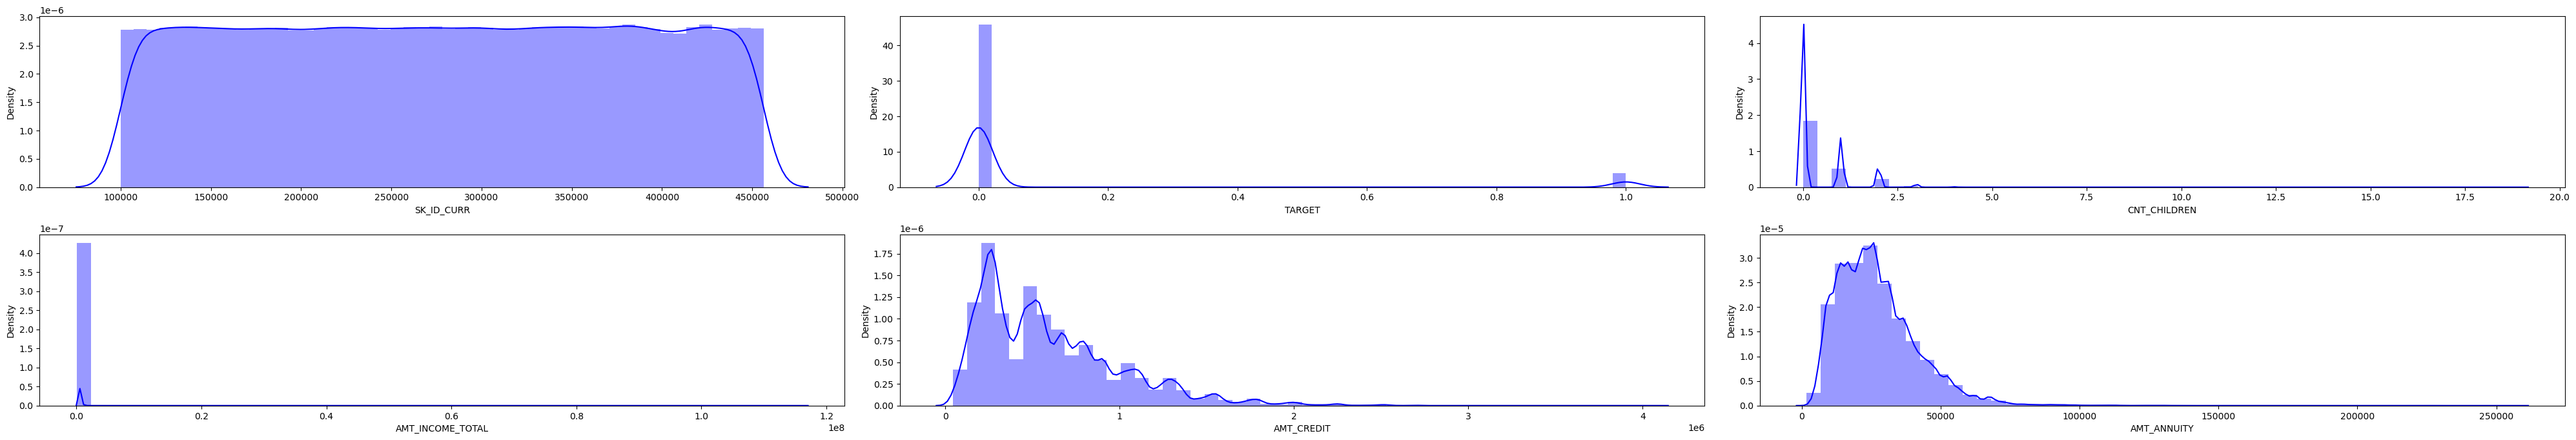

In [116]:
plt.figure(figsize=(40, 20))
for i in range(0, 6):
    plt.subplot(6, 3, i+1)
    sns.distplot(app_train_cleaned[numeric].iloc[:,i], color='blue')
    plt.tight_layout()

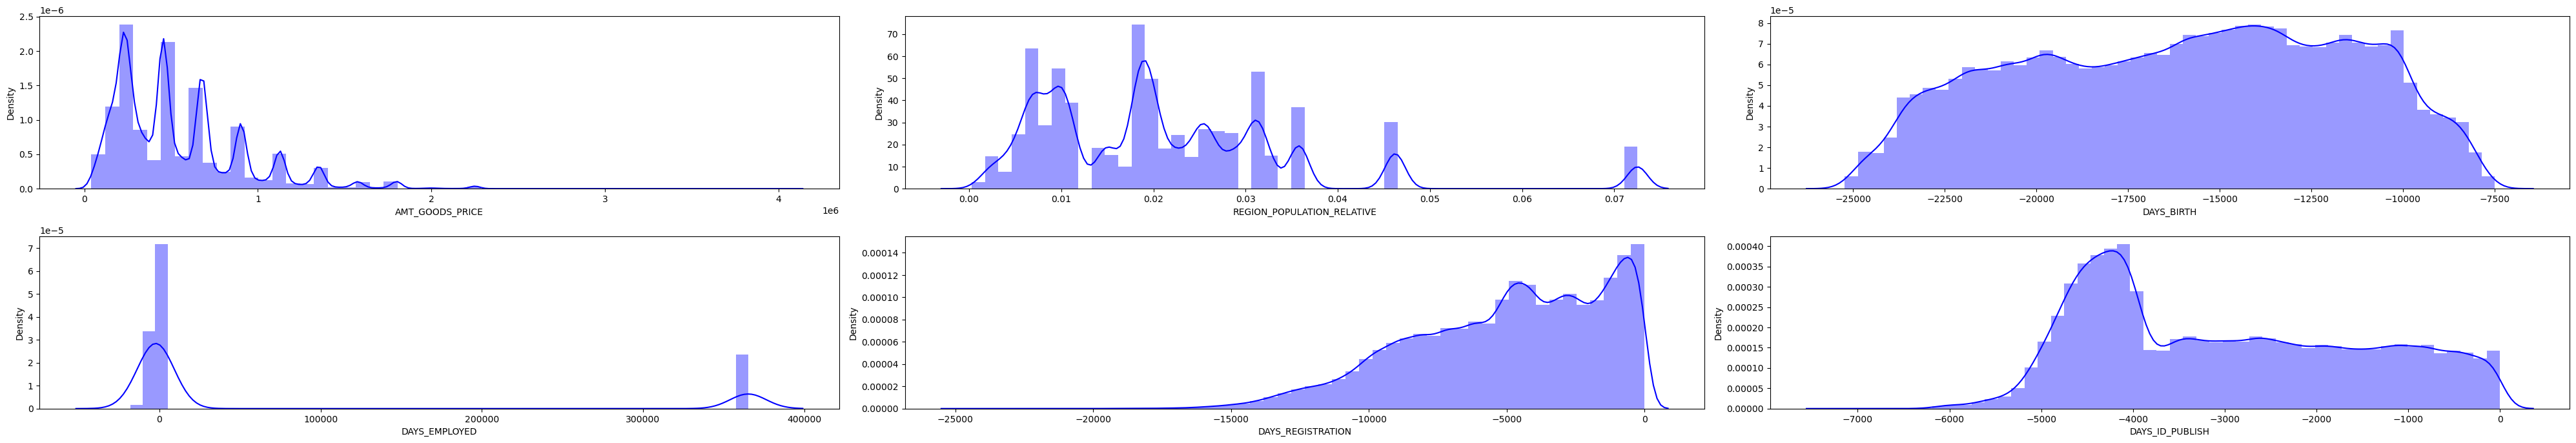

In [115]:
plt.figure(figsize=(40, 20))
for i in range(6, 12):
    plt.subplot(6, 3, i+1)
    sns.distplot(app_train_cleaned[numeric].iloc[:,i], color='blue')
    plt.tight_layout()

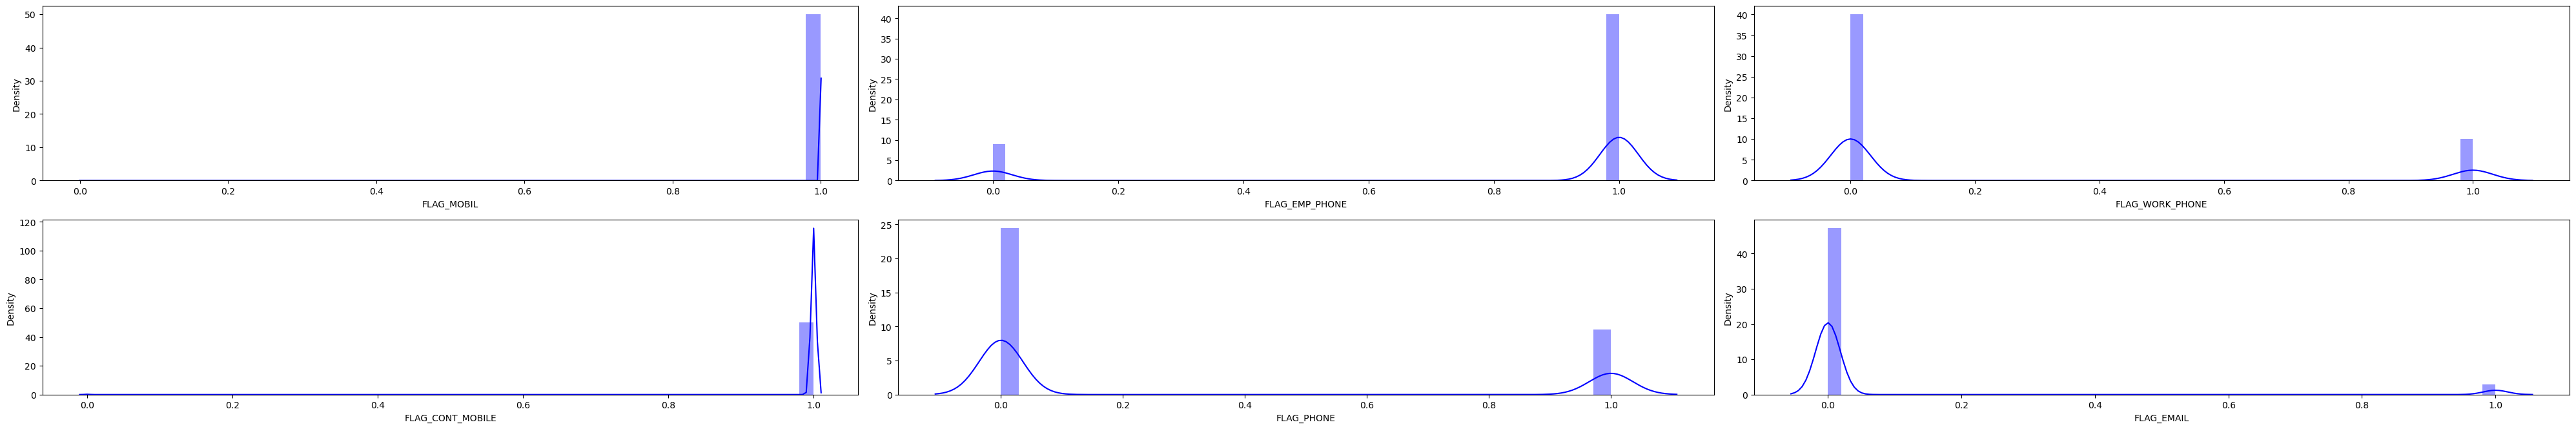

In [117]:
plt.figure(figsize=(40, 20))
for i in range(12, 18):
    plt.subplot(6, 3, i+1)
    sns.distplot(app_train_cleaned[numeric].iloc[:,i], color='blue')
    plt.tight_layout()

In [29]:
app_train_cleaned[categorical]

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE WEEKDAY_APPR_PROCESS_START  \
0       Single / not married  House / apartment                  WEDNESDAY   
1                    Married  House / apartment                     MONDAY   
2       Single / not married  House / apartment                     MONDAY   
3             Civil marriage  House / apartment                  WEDNESDAY   
4       Single / not married  House / apartment                   THURSDAY   
...                      ...                ...                        ...   
307506             Separated       With parents                   THURSDAY   
307507                 Widow  House / apartment                     MONDAY   
307508             Separated  House / apartment                   THURSDAY   
307509               Married  House / apartment                  WEDNESDAY   
307510               Married  House / apartment                   THURSDAY   

             ORGANIZATION_TYPE  
0       Business Entity Type 3  
1                       School  
2                   Government  
3       Business Entity Type 3  
4                     Religion  
...                        ...  
307506                Services  
307507                     XNA  
307508                  School  
307509  Business Entity Type 1  
307510  Business Entity Type 3  

[307511 rows x 11 columns]

In [30]:
app_train_cleaned[categorical].describe().T

count unique                            top  \
NAME_CONTRACT_TYPE          307511      2                     Cash loans   
CODE_GENDER                 307511      3                              F   
FLAG_OWN_CAR                307511      2                              N   
FLAG_OWN_REALTY             307511      2                              Y   
NAME_TYPE_SUITE             306219      7                  Unaccompanied   
NAME_INCOME_TYPE            307511      8                        Working   
NAME_EDUCATION_TYPE         307511      5  Secondary / secondary special   
NAME_FAMILY_STATUS          307511      6                        Married   
NAME_HOUSING_TYPE           307511      6              House / apartment   
WEEKDAY_APPR_PROCESS_START  307511      7                        TUESDAY   
ORGANIZATION_TYPE           307511     58         Business Entity Type 3   

                              freq  
NAME_CONTRACT_TYPE          278232  
CODE_GENDER                 202448  
FLAG_OWN_CAR                202924  
FLAG_OWN_REALTY             213312  
NAME_TYPE_SUITE             248526  
NAME_INCOME_TYPE            158774  
NAME_EDUCATION_TYPE         218391  
NAME_FAMILY_STATUS          196432  
NAME_HOUSING_TYPE           272868  
WEEKDAY_APPR_PROCESS_START   53901  
ORGANIZATION_TYPE            67992

# Data Preprocessing

## Handling Missing Value

In [31]:
nulls_percent = []
for i in app_train_cleaned.columns:
    tmp = len(app_train_cleaned[app_train_cleaned[i].isnull()]) / len(app_train_cleaned) * 100
    nulls_percent.append(round(tmp, 2))

null_df = pd.DataFrame(data=nulls_percent, index=app_train_cleaned.columns, columns=['% Nulls'])
null_df = null_df[null_df['% Nulls'] != 0]

In [32]:
null_df

% Nulls
AMT_GOODS_PRICE              0.09
NAME_TYPE_SUITE              0.42
EXT_SOURCE_2                 0.21
OBS_30_CNT_SOCIAL_CIRCLE     0.33
DEF_30_CNT_SOCIAL_CIRCLE     0.33
OBS_60_CNT_SOCIAL_CIRCLE     0.33
DEF_60_CNT_SOCIAL_CIRCLE     0.33

In [33]:
app_train_cleaned.dropna(subset=['AMT_GOODS_PRICE','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'], inplace = True)

In [34]:
app_train_cleaned['EXT_SOURCE_2'] = app_train_cleaned['EXT_SOURCE_2'].fillna(app_train_cleaned['EXT_SOURCE_2'].median())
app_train_cleaned['NAME_TYPE_SUITE'] = app_train_cleaned['NAME_TYPE_SUITE'].fillna(app_train_cleaned['NAME_TYPE_SUITE'].mode()[0])

In [35]:
app_train_cleaned

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                     0                0                0                 0   
1                     0                0                0                 0   
2                     0                0                0                 0   
3                     0                0                0                 0   
4                     0                0                0                 0   
...                 ...              ...              ...               ...   
307506                0                0                0                 0   
307507                0                0                0                 0   
307508                0                0                0                 0   
307509                0                0                0                 0   
307510                0                0                0                 0   

        FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                      0                 0                 0  
1                      0                 0                 0  
2                      0                 0                 0  
3                      0                 0                 0  
4                      0                 0           

## Handling Duplicate Data

In [36]:
# checking duplicate data
app_train_cleaned.duplicated().sum()

0

## Outlier

In [37]:
# ChecK Outlier
def calculate_outliers(column):
  # Calculate the IQR
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1

  # Define lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Filter the column to count outliers
  outliers = column[(column < lower_bound) | (column > upper_bound)]

  # Calculate percentage of outliers
  percentage_outliers = (outliers.shape[0] / column.shape[0]) * 100

  return outliers.shape[0], percentage_outliers

In [38]:
outliers_info = []

for feature in numeric:
  num_outliers, percentage_outliers = calculate_outliers(app_train_cleaned[feature])

  # if percentage_outliers > 0:
  outliers_info.append({
      'feature': feature,
      'outlier_count': num_outliers,
      'percentage_outliers': percentage_outliers
  })

outliers_df = pd.DataFrame(outliers_info).sort_values(by='percentage_outliers', ascending=False)
outliers_df

feature  outlier_count  percentage_outliers
19         REGION_RATING_CLIENT          80144            26.172717
20  REGION_RATING_CLIENT_W_CITY          77659            25.361188
9                 DAYS_EMPLOYED          71968            23.502671
26       REG_CITY_NOT_WORK_CITY          70606            23.057881
14              FLAG_WORK_PHONE          61093            19.951210
13               FLAG_EMP_PHONE          55192            18.024114
27      LIVE_CITY_NOT_WORK_CITY          55010            17.964678
30     DEF_30_CNT_SOCIAL_CIRCLE          35135            11.474077
38              FLAG_DOCUMENT_6          27074             8.841587
32     DEF_60_CNT_SOCIAL_CIRCLE          25746             8.407900
40              FLAG_DOCUMENT_8          25013             8.168524
1                        TARGET          24768             8.088514
25       REG_CITY_NOT_LIVE_CITY          23950             7.821379
29     OBS_30_CNT_SOCIAL_CIRCLE          19954             6.516400
31     OBS_60_CNT_SOCIAL_CIRCLE          19548             6.383813
17                   FLAG_EMAIL          17383             5.676786
23   REG_REGION_NOT_WORK_REGION          15536             5.073609
6               AMT_GOODS_PRICE          14654             4.785573
3              AMT_INCOME_TOTAL          13883             4.533787
24  LIVE_REGION_NOT_WORK_REGION          12429             4.058953
7    REGION_POPULATION_RELATIVE           8309             2.713480
5                   AMT_ANNUITY           7425             2.424791
4                    AMT_CREDIT           6559             2.141980
22   REG_REGION_NOT_LIVE_REGION           4640             1.515290
37              FLAG_DOCUMENT_5           4494             1.467611
2                  CNT_CHILDREN           4255             1.389560
18              CNT_FAM_MEMBERS           3991             1.303345
48             FLAG_DOCUMENT_16           3052             0.996695
50             FLAG_DOCUMENT_18           2500             0.816428
21      HOUR_APPR_PROCESS_START           2251             0.735112
43             FLAG_DOCUMENT_11           1203             0.392865
41              FLAG_DOCUMENT_9           1187             0.387640
45             FLAG_DOCUMENT_13           1084             0.354003
46             FLAG_DOCUMENT_14            903             0.294894
10            DAYS_REGISTRATION            657             0.214557
15             FLAG_CONT_MOBILE            567             0.185166
33       DAYS_LAST_PHONE_CHANGE            431             0.140752
47             FLAG_DOCUMENT_15            371             0.121158
51             FLAG_DOCUMENT_19            183             0.059763
52             FLAG_DOCUMENT_20            156             0.050945
53             FLAG_DOCUMENT_21            100             0.032657
49             FLAG_DOCUMENT_17             82             0.026779
39              FLAG_DOCUMENT_7             42             0.013716
36              FLAG_DOCUMENT_4             25             0.008164
34              FLAG_DOCUMENT_2             13             0.004245
42             FLAG_DOCUMENT_10              6             0.001959
44             FLAG_DOCUMENT_12              2             0.000653
12                   FLAG_MOBIL              1             0.000327
35              FLAG_DOCUMENT_3              0             0.000000
28                 EXT_SOURCE_2              0             0.000000
16                   FLAG_PHONE              0             0.000000
11              DAYS_ID_PUBLISH              0             0.000000
8                    DAYS_BIRTH              0             0.000000
0                    SK_ID_CURR              0             0.000000

In [39]:
print(f'Jumlah baris sebelum memfilter outlier: {len(app_train_cleaned)}')

filtered_entries = np.array([True] * len(app_train_cleaned))
for col in ['AMT_GOODS_PRICE','AMT_INCOME_TOTAL', 'AMT_ANNUITY','AMT_CREDIT'] :
    Q1 = app_train_cleaned[col].quantile(0.25)
    Q3 = app_train_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((app_train_cleaned[col] >= low_limit) & (app_train_cleaned[col] <= high_limit)) & filtered_entries

app_train_filter = app_train_cleaned[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(app_train_filter)}')

Jumlah baris sebelum memfilter outlier: 306212
Jumlah baris setelah memfilter outlier: 277857


In [40]:
app_train_filter.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

## Feature Encoding

In [41]:
app_train_filter
app_train_fe = app_train_filter.copy()

In [42]:
app_train_fe

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                     0                0                0                 0   
1                     0                0                0                 0   
2                     0                0                0                 0   
3                     0                0                0                 0   
4                     0                0                0                 0   
...                 ...              ...              ...               ...   
307506                0                0                0                 0   
307507                0                0                0                 0   
307508                0                0                0                 0   
307509                0                0                0                 0   
307510                0                0                0                 0   

        FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                      0                 0                 0  
1                      0                 0                 0  
2                      0                 0                 0  
3                      0                 0                 0  
4                      0                 0           

In [43]:
num = (app_train_fe.dtypes != 'object')
col_num = list(num[num].index)
col_num

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOC

In [44]:
cats = (app_train_fe.dtypes == 'object')
col_cat = list(cats[cats].index)
col_cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [45]:
for col in col_cat:
    print(f'''Value count kolom {col}:''')
    print(app_train_fe[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
NAME_CONTRACT_TYPE
Cash loans         251580
Revolving loans     26277
Name: count, dtype: int64

Value count kolom CODE_GENDER:
CODE_GENDER
F      185804
M       92049
XNA         4
Name: count, dtype: int64

Value count kolom FLAG_OWN_CAR:
FLAG_OWN_CAR
N    188325
Y     89532
Name: count, dtype: int64

Value count kolom FLAG_OWN_REALTY:
FLAG_OWN_REALTY
Y    193386
N     84471
Name: count, dtype: int64

Value count kolom NAME_TYPE_SUITE:
NAME_TYPE_SUITE
Unaccompanied      225411
Family              36417
Spouse, partner     10300
Children             3041
Other_B              1647
Other_A               795
Group of people       246
Name: count, dtype: int64

Value count kolom NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 146690
Commercial associate     60343
Pensioner                51908
State servant            18877
Student                     17
Unemployed                  16
Businessman                  3
Maternity leave         

In [46]:
app_train_fe['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      225411
Family              36417
Spouse, partner     10300
Children             3041
Other_B              1647
Other_A               795
Group of people       246
Name: count, dtype: int64

In [47]:

app_train_fe['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 146690
Commercial associate     60343
Pensioner                51908
State servant            18877
Student                     17
Unemployed                  16
Businessman                  3
Maternity leave              3
Name: count, dtype: int64

In [48]:

app_train_fe['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 174532
Single / not married     42112
Civil marriage           27624
Separated                18181
Widow                    15408
Name: count, dtype: int64

In [49]:

app_train_fe['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      245970
With parents            13930
Municipal apartment     10146
Rented apartment         4503
Office apartment         2286
Co-op apartment          1022
Name: count, dtype: int64

In [174]:
app_train_fe['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    59456
XNA                       51915
Self-employed             35135
Other                     14968
Medicine                  10264
Business Entity Type 2     9583
Government                 9493
School                     8142
Trade: type 7              7093
Kindergarten               6483
Construction               5878
Business Entity Type 1     5263
Transport: type 4          4775
Trade: type 3              3231
Industry: type 3           3099
Security                   2983
Industry: type 9           2881
Housing                    2707
Industry: type 11          2512
Agriculture                2315
Bank                       2135
Military                   2132
Postal                     2058
Transport: type 2          2016
Police                     1949
Restaurant                 1688
Trade: type 2              1659
Security Ministries        1634
Services                   1402
Industry: type 7           1211
University            

In [50]:
# Label encoding
# mapping

mapping_contract_type = {
    'Cash loans' : 1,
    'Revolving loans' : 2
}

mapping_gender = {
    'F' : 0,
    'M' : 1,
    'XNA': 2
}

mapping_own_car = {
    'Y' : 1,
    'N' : 2
}

mapping_own_realty = {
    'Y' : 1,
    'N' : 2
}

mapping_education = {
    'Academic degree' : 1,
    'Lower secondary' : 2,
    'Incomplete higher' : 3,
    'Higher education' : 4,
    'Secondary / secondary special' : 5
}

mapping_weekday_proces_start = {
    'MONDAY' : 1,
    'TUESDAY' : 2,
    'WEDNESDAY' : 3,
    'THURSDAY' : 4,
    'FRIDAY' : 5,
    'SATURDAY' : 6,
    'SUNDAY' : 7
}


app_train_fe['NAME_CONTRACT_TYPE'] = app_train_fe['NAME_CONTRACT_TYPE'].map(mapping_contract_type)

app_train_fe['CODE_GENDER'] = app_train_fe['CODE_GENDER'].map(mapping_gender)

app_train_fe['FLAG_OWN_CAR'] = app_train_fe['FLAG_OWN_CAR'].map(mapping_own_car)

app_train_fe['FLAG_OWN_REALTY'] = app_train_fe['FLAG_OWN_REALTY'].map(mapping_own_realty)

app_train_fe['NAME_EDUCATION_TYPE'] = app_train_fe['NAME_EDUCATION_TYPE'].map(mapping_education)

app_train_fe['WEEKDAY_APPR_PROCESS_START'] = app_train_fe['WEEKDAY_APPR_PROCESS_START'].map(mapping_weekday_proces_start)

In [51]:
app_train_fe

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   1            1             2   
1           100003       0                   1            0             2   
2           100004       0                   2            1             1   
3           100006       0                   1            0             2   
4           100007       0                   1            1             2   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   1            1             2   
307507      456252       0                   1            0             2   
307508      456253       0                   1            0             2   
307509      456254       1                   1            0             2   
307510      456255       0                   1            0             2   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     2             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                2             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                2             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

        FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                      0                0                0                 0   
1                      0                0                0                 0   
2                      0                0                0                 0   
3                      0                0                0                 0   
4                      0                0                0                 0   
...                  ...              ...              ...               ...   
307506                 0                0                0                 0   
307507                 0                0                0                 0   
307508                 0                0                0                 0   
307509                 0                0                0                 0   
307510                 0                0                0                 0   

        FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                      0                 0                 0  
1                      0                 0                 0  
2                      0                 0                 0  
3                      0                 0              

In [52]:
# one hot encoding

# List of categorical columns
cols_cats = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

# Dataframe
app_train_fe

# One-hot encode categorical columns using pandas
app_train_fe = pd.get_dummies(app_train_fe, columns=cols_cats, drop_first=True)

In [120]:
app_train_fe

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   1            1             2   
1           100003       0                   1            0             2   
2           100004       0                   2            1             1   
3           100006       0                   1            0             2   
4           100007       0                   1            1             2   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   1            1             2   
307507      456252       0                   1            0             2   
307508      456253       0                   1            0             2   
307509      456254       1                   1            0             2   
307510      456255       0                   1            0             2   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     2             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                2             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                2             0          157500.0    675000.0   

        AMT_ANNUITY  ...  NAME_INCOME_TYPE_Working  \
0           24700.5  ...                         1   
1           35698.5  ...                         0   
2            6750.0  ...                         1   
3           29686.5  ...                         1   
4           21865.5  ...                         1   
...             ...  ...                       ...   
307506      27558.0  ...                         1   
307507      12001.5  ...                         0   
307508      29979.0  ...                         1   
307509      20205.0  ...                         0   
307510      49117.5  ...                         0   

        NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  \
0                                0                             0   
1                                1                             0   
2                                0                             0   
3                                0                             0   
4                                0                             0   
...                            ...                           ...   
307506                           0                             1   
307507                           0                             0   
307508                           0                             1   
307509                           1                             0   
307510                           1                             0   

        NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
0                                             1                         0   
1                                             0                         0   
2                                             1                         0   
3                                             0                         0   
4                                             1                         0   
...                                         ...                       ...   
307506                                        0                         0   
307507                                        0                         1   
307508                                        0                        

In [121]:
# Replace 'False' with 0 and 'True' with 1
app_train_fe.replace({False: 0, True: 1}, inplace=True)

In [122]:
app_train_fe

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   1            1             2   
1           100003       0                   1            0             2   
2           100004       0                   2            1             1   
3           100006       0                   1            0             2   
4           100007       0                   1            1             2   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   1            1             2   
307507      456252       0                   1            0             2   
307508      456253       0                   1            0             2   
307509      456254       1                   1            0             2   
307510      456255       0                   1            0             2   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     2             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                2             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                2             0          157500.0    675000.0   

        AMT_ANNUITY  ...  NAME_INCOME_TYPE_Working  \
0           24700.5  ...                         1   
1           35698.5  ...                         0   
2            6750.0  ...                         1   
3           29686.5  ...                         1   
4           21865.5  ...                         1   
...             ...  ...                       ...   
307506      27558.0  ...                         1   
307507      12001.5  ...                         0   
307508      29979.0  ...                         1   
307509      20205.0  ...                         0   
307510      49117.5  ...                         0   

        NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  \
0                                0                             0   
1                                1                             0   
2                                0                             0   
3                                0                             0   
4                                0                             0   
...                            ...                           ...   
307506                           0                             1   
307507                           0                             0   
307508                           0                             1   
307509                           1                             0   
307510                           1                             0   

        NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
0                                             1                         0   
1                                             0                         0   
2                                             1                         0   
3                                             0                         0   
4                                             1                         0   
...                                         ...                       ...   
307506                                        0                         0   
307507                                        0                         1   
307508                                        0                        

## Feature Selection

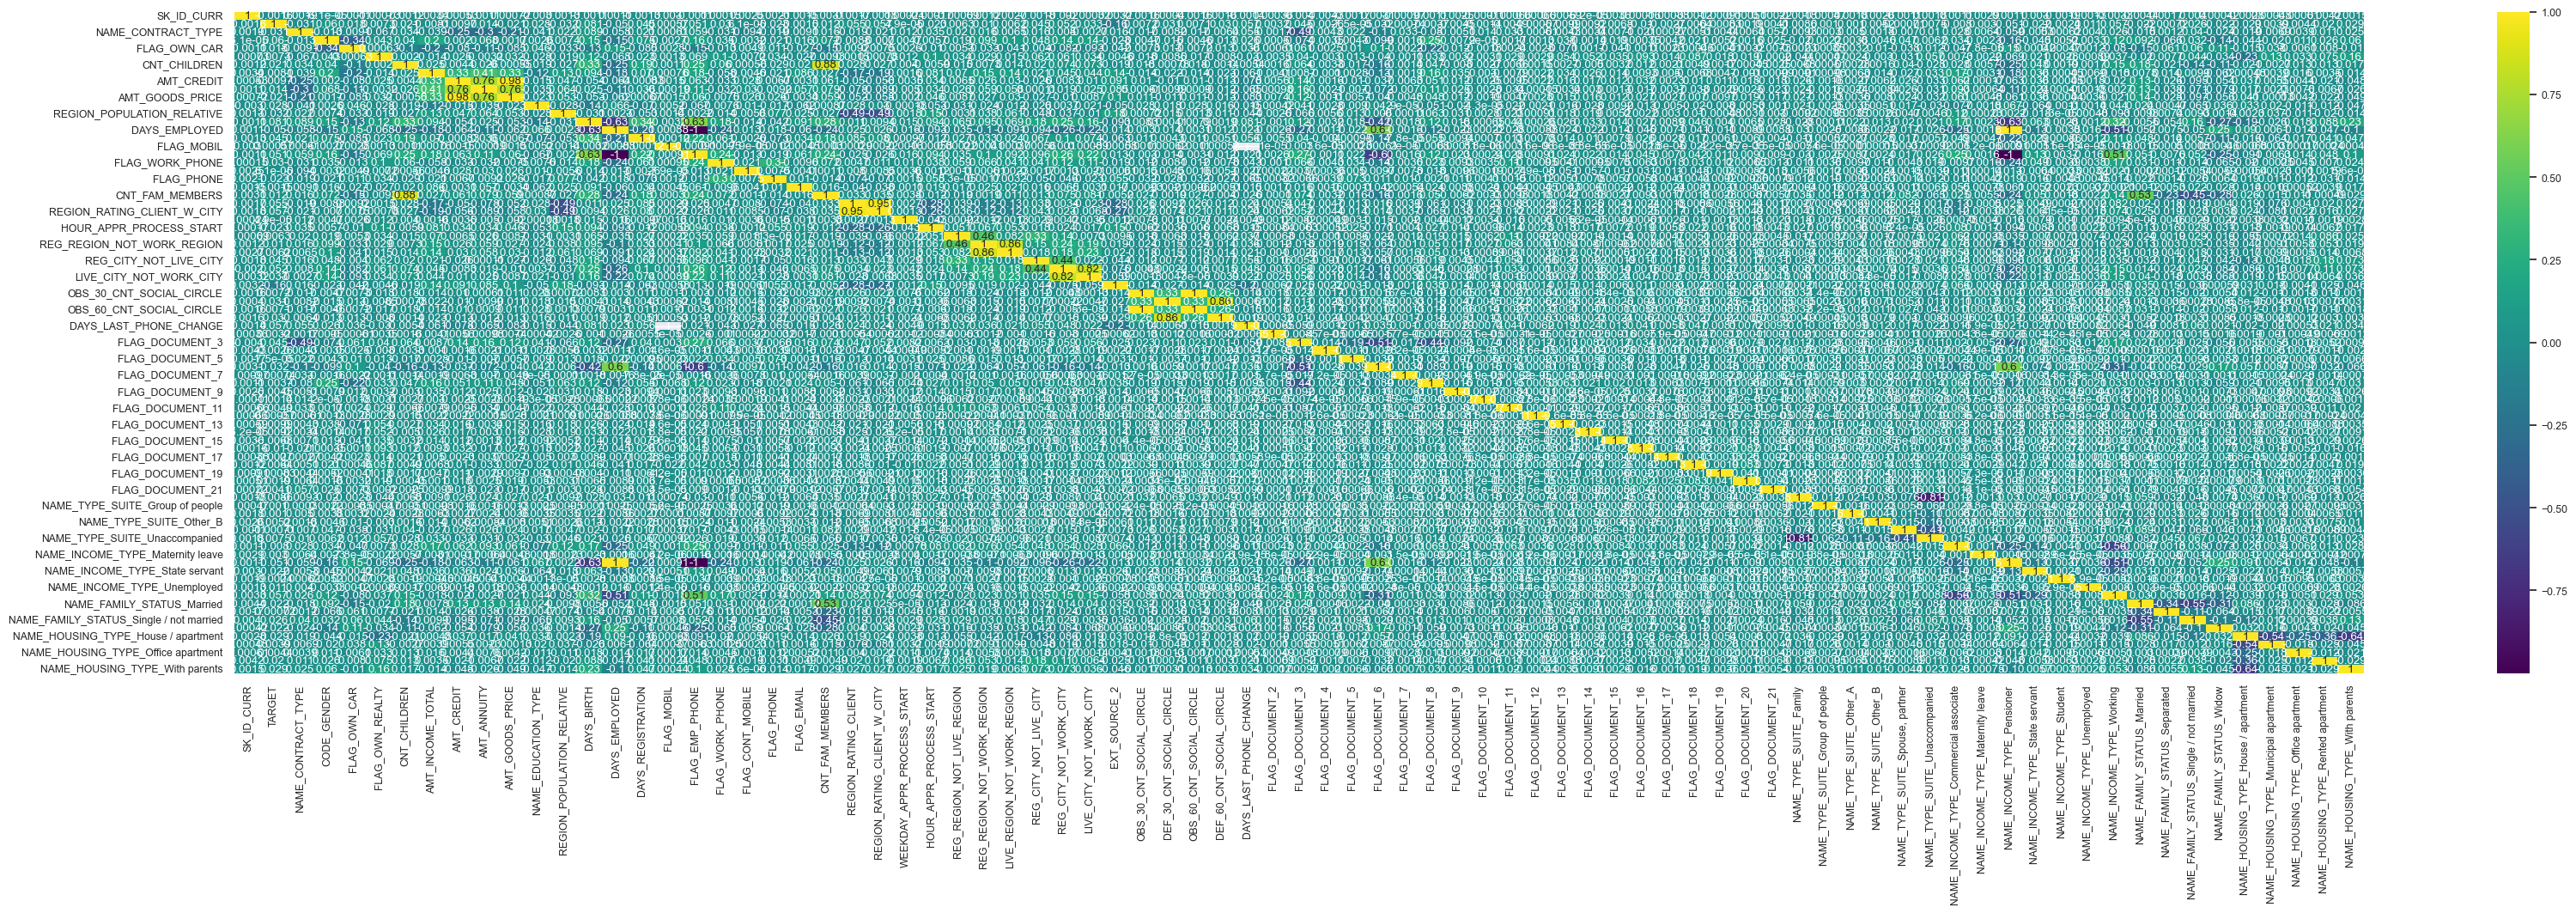

In [123]:
non_used = ['DAYS_ID_PUBLISH']
uni_dist = app_train_fe.select_dtypes(include=[np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]
fig = plt.figure(figsize = (40,10))
sns.heatmap(uni_dist.corr(),cmap='viridis', annot = True);

In [124]:
def top_correlation(app_train_fe, n):
    corr_matrix = app_train_fe.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    correlation = (upper.stack()
                   .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns = ["Variable_1", "Variable_2", "Correlation"]
    correlation = correlation.reindex(correlation['Correlation'].abs().sort_values(ascending=False).index).reset_index(drop=True)
    return correlation.head(n)

print("High Correlated Features (Corr > 0.5)")
top_correlation(uni_dist, 39)

High Correlated Features (Corr > 0.5)


Variable_1  \
0                           DAYS_EMPLOYED   
1                          FLAG_EMP_PHONE   
2                           DAYS_EMPLOYED   
3                OBS_30_CNT_SOCIAL_CIRCLE   
4                              AMT_CREDIT   
5                    REGION_RATING_CLIENT   
6                            CNT_CHILDREN   
7                DEF_30_CNT_SOCIAL_CIRCLE   
8              REG_REGION_NOT_WORK_REGION   
9                  REG_CITY_NOT_WORK_CITY   
10                 NAME_TYPE_SUITE_Family   
11                            AMT_ANNUITY   
12                             AMT_CREDIT   
13    NAME_HOUSING_TYPE_House / apartment   
14                             DAYS_BIRTH   
15                             DAYS_BIRTH   
16                             DAYS_BIRTH   
17                        FLAG_DOCUMENT_6   
18                         FLAG_EMP_PHONE   
19                          DAYS_EMPLOYED   
20  NAME_INCOME_TYPE_Commercial associate   
21             NAME_FAMILY_STATUS_Married   
22    NAME_HOUSING_TYPE_House / apartment   
23                        CNT_FAM_MEMBERS   
24                        FLAG_DOCUMENT_3   
25             NAME_INCOME_TYPE_Pensioner   
26                         FLAG_EMP_PHONE   
27                          DAYS_EMPLOYED   
28             REGION_POPULATION_RELATIVE   
29             REGION_POPULATION_RELATIVE   
30                     NAME_CONTRACT_TYPE   
31             REG_REGION_NOT_LIVE_REGION   
32                        CNT_FAM_MEMBERS   
33                        FLAG_DOCUMENT_3   
34                 REG_CITY_NOT_LIVE_CITY   
35                             DAYS_BIRTH   
36                       AMT_INCOME_TOTAL   
37        NAME_TYPE_SUITE_Spouse, partner   
38    NAME_HOUSING_TYPE_House / apartment   

                                 Variable_2  Correlation  
0                            FLAG_EMP_PHONE    -0.999785  
1                NAME_INCOME_TYPE_Pensioner    -0.999597  
2                NAME_INCOME_TYPE_Pensioner     0.999595  
3                  OBS_60_CNT_SOCIAL_CIRCLE     0.998487  
4                           AMT_GOODS_PRICE     0.981912  
5               REGION_RATING_CLIENT_W_CITY     0.951521  
6                           CNT_FAM_MEMBERS     0.877532  
7                  DEF_60_CNT_SOCIAL_CIRCLE     0.862437  
8               LIVE_REGION_NOT_WORK_REGION     0.860195  
9                   LIVE_CITY_NOT_WORK_CITY     0.823986  
10            NAME_TYPE_SUITE_Unaccompanied    -0.805154  
11                          AMT_GOODS_PRICE     0.756271  
12                              AMT_ANNUITY     0.755874  
13           NAME_HOUSING_TYPE_With parents    -0.638069  
14               NAME_INCOME_TYPE_Pensioner    -0.631898  
15                           FLAG_EMP_PHONE     0.631765  
16                            DAYS_EMPLOYED    -0.627864  
17               NAME_INCOME_TYPE_Pensioner     0.603384  
18                          FLAG_DOCUMENT_6    -0.603265  
19                          FLAG_DOCUMENT_6     0.603010  
20                 NAME_INCOME_TYPE_Working    -0.557003  
21  NAME_FAMILY_STATUS_Single / not married    -0.549309  
22    NAME_HOUSING_TYPE_Municipal apartment    -0.540690  
23               NAME_FAMILY_STATUS_Married     0.525911  
24                          FLAG_DOCUMENT_6    -0.508348  
25                 NAME_INCOME_TYPE_Working    -0.506874  
26                 NAME_INCOME_TYPE_Working     0.506859  
27                 NAME_INCOME_TYPE_Working    -0.506667  
28              REGION_RATING_CLIENT_W_CITY    -0.494780  
29                     REGION_RATING_CLIENT    -0.494702  
30                          FLAG_DOCUMENT_3    -0.487099  
31               REG_REGION_NOT_WORK_REGION     0.455947  
32  NAME_FAMILY_STATUS_Single / not married    -0.448803  
33                          FLAG_DOCUMENT_8    -0.443698  
34                   REG_CITY_NOT_WORK_CITY     0.442514  
35                          FLAG_DOCUMENT_6    -0.416578  
36                              AMT_ANNUITY    

In [125]:
uni_dist.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             2   
1      100003       0                   1            0             2   
2      100004       0                   2            1             1   
3      100006       0                   1            0             2   
4      100007       0                   1            1             2   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                2             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   ...  NAME_INCOME_TYPE_Working  NAME_FAMILY_STATUS_Married  \
0  ...                         1                           0   
1  ...                         0                           1   
2  ...                         1                           0   
3  ...                         1                           0   
4  ...                         1                           0   

   NAME_FAMILY_STATUS_Separated  NAME_FAMILY_STATUS_Single / not married  \
0                             0                                        1   
1                             0                                        0   
2                             0                                        1   
3                             0                                        0   
4                             0                                        1   

   NAME_FAMILY_STATUS_Widow  NAME_HOUSING_TYPE_House / apartment  \
0                         0                                    1   
1                         0                                    1   
2                         0                                    1   
3                         0                                    1   
4                         0                                    1   

   NAME_HOUSING_TYPE_Municipal apartment  NAME_HOUSING_TYPE_Office apartment  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   NAME_HOUSING_TYPE_Rented apartment  NAME_HOUSING_TYPE_With parents  
0                                   0                               0  
1                                   0                               0  
2                                   0                               0  
3                                   0                               0  
4                                   0                               0  

[5 rows x 81 columns]

In [126]:
uni_dist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277857 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   SK_ID_CURR                               277857 non-null  int64  
 1   TARGET                                   277857 non-null  int64  
 2   NAME_CONTRACT_TYPE                       277857 non-null  int64  
 3   CODE_GENDER                              277857 non-null  int64  
 4   FLAG_OWN_CAR                             277857 non-null  int64  
 5   FLAG_OWN_REALTY                          277857 non-null  int64  
 6   CNT_CHILDREN                             277857 non-null  int64  
 7   AMT_INCOME_TOTAL                         277857 non-null  float64
 8   AMT_CREDIT                               277857 non-null  float64
 9   AMT_ANNUITY                              277857 non-null  float64
 10  AMT_GOODS_PRICE                      

In [127]:
app_train_fs = uni_dist.copy()

In [128]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [129]:
app_train_fs['AMT_INCOME_TOTAL'] = StandardScaler().fit_transform(app_train_fs[['AMT_INCOME_TOTAL']])
app_train_fs['AMT_CREDIT'] = StandardScaler().fit_transform(app_train_fs[['AMT_CREDIT']])
app_train_fs['AMT_ANNUITY'] = StandardScaler().fit_transform(app_train_fs[['AMT_ANNUITY']])
app_train_fs['AMT_GOODS_PRICE'] = StandardScaler().fit_transform(app_train_fs[['AMT_GOODS_PRICE']])
app_train_fs['REGION_POPULATION_RELATIVE'] = StandardScaler().fit_transform(app_train_fs[['REGION_POPULATION_RELATIVE']])
app_train_fs['DAYS_BIRTH'] = StandardScaler().fit_transform(app_train_fs[['DAYS_BIRTH']])
app_train_fs['DAYS_EMPLOYED'] = StandardScaler().fit_transform(app_train_fs[['DAYS_EMPLOYED']])
app_train_fs['DAYS_REGISTRATION'] = StandardScaler().fit_transform(app_train_fs[['DAYS_REGISTRATION']])
app_train_fs['EXT_SOURCE_2'] = StandardScaler().fit_transform(app_train_fs[['EXT_SOURCE_2']])

In [130]:
app_train_fs

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   1            1             2   
1           100003       0                   1            0             2   
2           100004       0                   2            1             1   
3           100006       0                   1            0             2   
4           100007       0                   1            1             2   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   1            1             2   
307507      456252       0                   1            0             2   
307508      456253       0                   1            0             2   
307509      456254       1                   1            0             2   
307510      456255       0                   1            0             2   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          0.824985   -0.395833   
1                     2             0          1.906552    2.387708   
2                     1             0         -1.338150   -1.248238   
3                     1             0         -0.256583   -0.690584   
4                     1             0         -0.472896   -0.061890   
...                 ...           ...               ...         ...   
307506                2             0          0.103940   -0.872561   
307507                1             0         -1.266046   -0.825955   
307508                1             0          0.031835    0.454906   
307509                1             0          0.320253   -0.510358   
307510                2             0          0.103940    0.446545   

        AMT_ANNUITY  ...  NAME_INCOME_TYPE_Working  \
0         -0.003960  ...                         1   
1          0.961582  ...                         0   
2         -1.579879  ...                         1   
3          0.433773  ...                         1   
4         -0.252852  ...                         1   
...             ...  ...                       ...   
307506     0.246907  ...                         1   
307507    -1.118837  ...                         0   
307508     0.459452  ...                         1   
307509    -0.398631  ...                         0   
307510     2.139669  ...                         0   

        NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  \
0                                0                             0   
1                                1                             0   
2                                0                             0   
3                                0                             0   
4                                0                             0   
...                            ...                           ...   
307506                           0                             1   
307507                           0                             0   
307508                           0                             1   
307509                           1                             0   
307510                           1                             0   

        NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
0                                             1                         0   
1                                             0                         0   
2                                             1                         0   
3                                             0                         0   
4                                             1                         0   
...                                         ...                       ...   
307506                                        0                         0   
307507                                        0                         1   
307508                                        0                        

In [131]:
data_train_prep = app_train_fs.copy()

## Anova & Chi Square Testing

In [132]:
data_train_prep

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   1            1             2   
1           100003       0                   1            0             2   
2           100004       0                   2            1             1   
3           100006       0                   1            0             2   
4           100007       0                   1            1             2   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   1            1             2   
307507      456252       0                   1            0             2   
307508      456253       0                   1            0             2   
307509      456254       1                   1            0             2   
307510      456255       0                   1            0             2   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          0.824985   -0.395833   
1                     2             0          1.906552    2.387708   
2                     1             0         -1.338150   -1.248238   
3                     1             0         -0.256583   -0.690584   
4                     1             0         -0.472896   -0.061890   
...                 ...           ...               ...         ...   
307506                2             0          0.103940   -0.872561   
307507                1             0         -1.266046   -0.825955   
307508                1             0          0.031835    0.454906   
307509                1             0          0.320253   -0.510358   
307510                2             0          0.103940    0.446545   

        AMT_ANNUITY  ...  NAME_INCOME_TYPE_Working  \
0         -0.003960  ...                         1   
1          0.961582  ...                         0   
2         -1.579879  ...                         1   
3          0.433773  ...                         1   
4         -0.252852  ...                         1   
...             ...  ...                       ...   
307506     0.246907  ...                         1   
307507    -1.118837  ...                         0   
307508     0.459452  ...                         1   
307509    -0.398631  ...                         0   
307510     2.139669  ...                         0   

        NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  \
0                                0                             0   
1                                1                             0   
2                                0                             0   
3                                0                             0   
4                                0                             0   
...                            ...                           ...   
307506                           0                             1   
307507                           0                             0   
307508                           0                             1   
307509                           1                             0   
307510                           1                             0   

        NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
0                                             1                         0   
1                                             0                         0   
2                                             1                         0   
3                                             0                         0   
4                                             1                         0   
...                                         ...                       ...   
307506                                        0                         0   
307507                                        0                         1   
307508                                        0                        

In [134]:
y = data_train_prep['TARGET']

In [135]:
col_num

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOC

### Anova

In [136]:
feature_num = data_train_prep[['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']]

In [137]:

from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

In [138]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline


In [139]:
# Buat pipeline dengan imputer dan SelectKBest
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('select', SelectKBest(score_func=f_classif, k='all'))
])

# Fit dan transform data
X_selected = pipeline.fit_transform(feature_num, y)

# Mendapatkan skor dan p-values
scores = pipeline.named_steps['select'].scores_
p_values = pipeline.named_steps['select'].pvalues_

# Membuat DataFrame hasil
result = pd.DataFrame({
    'feature': feature_num.columns,
    'score': scores,
    'p_value': p_values
})


In [140]:
# Mengurutkan hasil berdasarkan skor
result_sorted = result.sort_values('p_value', ascending=False)
print(result_sorted)

                        feature        score        p_value
12             FLAG_CONT_MOBILE     0.001049   9.741622e-01
34              FLAG_DOCUMENT_5     0.001557   9.685197e-01
41             FLAG_DOCUMENT_12     0.091604   7.621478e-01
9                    FLAG_MOBIL     0.091606   7.621457e-01
36              FLAG_DOCUMENT_7     0.151801   6.968201e-01
48             FLAG_DOCUMENT_19     0.190992   6.620929e-01
39             FLAG_DOCUMENT_10     0.549636   4.584672e-01
14                   FLAG_EMAIL     0.639518   4.238862e-01
49             FLAG_DOCUMENT_20     1.039313   3.079822e-01
33              FLAG_DOCUMENT_4     1.923839   1.654352e-01
46             FLAG_DOCUMENT_17     1.997488   1.575612e-01
31              FLAG_DOCUMENT_2     2.870561   9.021454e-02
37              FLAG_DOCUMENT_8     3.757756   5.256408e-02
50             FLAG_DOCUMENT_21     4.606774   3.184675e-02
38              FLAG_DOCUMENT_9     5.720501   1.676861e-02
40             FLAG_DOCUMENT_11     6.69

berdasarkan hasil pengujian anova diperoleh P-value diatas, dapat disimpulakn bahwa terdapat variabel numerik yang tidak memiliki mempengaruh terhadap target yaitu :
*   'DAYS_BIRTH'
*   'EXT_SOURCE_2'

variabel tersebut akan dilakukan drop

In [188]:
result_sorted.head(30)

feature      score       p_value
12             FLAG_CONT_MOBILE   0.001049  9.741622e-01
34              FLAG_DOCUMENT_5   0.001557  9.685197e-01
41             FLAG_DOCUMENT_12   0.091604  7.621478e-01
9                    FLAG_MOBIL   0.091606  7.621457e-01
36              FLAG_DOCUMENT_7   0.151801  6.968201e-01
48             FLAG_DOCUMENT_19   0.190992  6.620929e-01
39             FLAG_DOCUMENT_10   0.549636  4.584672e-01
14                   FLAG_EMAIL   0.639518  4.238862e-01
49             FLAG_DOCUMENT_20   1.039313  3.079822e-01
33              FLAG_DOCUMENT_4   1.923839  1.654352e-01
46             FLAG_DOCUMENT_17   1.997488  1.575612e-01
31              FLAG_DOCUMENT_2   2.870561  9.021454e-02
37              FLAG_DOCUMENT_8   3.757756  5.256408e-02
50             FLAG_DOCUMENT_21   4.606774  3.184675e-02
38              FLAG_DOCUMENT_9   5.720501  1.676861e-02
40             FLAG_DOCUMENT_11   6.692876  9.680394e-03
21  LIVE_REGION_NOT_WORK_REGION  10.774444  1.029238e-03
19   REG_REGION_NOT_LIVE_REGION  10.973092  9.245618e-04
47             FLAG_DOCUMENT_18  11.526259  6.862954e-04
44             FLAG_DOCUMENT_15  12.952593  3.195343e-04
28     OBS_60_CNT_SOCIAL_CIRCLE  13.908500  1.919667e-04
26     OBS_30_CNT_SOCIAL_CIRCLE  14.448536  1.440725e-04
1              AMT_INCOME_TOTAL  18.100216  2.096462e-05
43             FLAG_DOCUMENT_14  23.355231  1.347485e-06
2                    AMT_CREDIT  26.116077  3.217082e-07
42             FLAG_DOCUMENT_13  27.021908  2.013044e-07
20   REG_REGION_NOT_WORK_REGION  28.291601  1.044282e-07
45             FLAG_DOCUMENT_16  28.854342  7.809326e-08
15              CNT_FAM_MEMBERS  39.605341  3.112929e-10
3                   AMT_ANNUITY  52.265774  4.859879e-13

In [190]:
features = result_sorted['feature'].head(30).tolist()

In [191]:
features

['FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_12',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_10',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_15',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_INCOME_TOTAL',
 'FLAG_DOCUMENT_14',
 'AMT_CREDIT',
 'FLAG_DOCUMENT_13',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_16',
 'CNT_FAM_MEMBERS',
 'AMT_ANNUITY']

### Chi Square

In [142]:
feature_cat = data_train_prep[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 
                               'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people','NAME_TYPE_SUITE_Other_A','NAME_TYPE_SUITE_Other_A','NAME_TYPE_SUITE_Other_B',
                               'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_INCOME_TYPE_Commercial associate','NAME_INCOME_TYPE_Maternity leave',
                               'NAME_INCOME_TYPE_Pensioner','NAME_INCOME_TYPE_State servant','NAME_INCOME_TYPE_Student','NAME_INCOME_TYPE_Unemployed','NAME_INCOME_TYPE_Working',
                               'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow','NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',
 ]].astype("category")

In [143]:
feature_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277857 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   NAME_CONTRACT_TYPE                       277857 non-null  category
 1   CODE_GENDER                              277857 non-null  category
 2   FLAG_OWN_CAR                             277857 non-null  category
 3   FLAG_OWN_REALTY                          277857 non-null  category
 4   NAME_EDUCATION_TYPE                      277857 non-null  category
 5   WEEKDAY_APPR_PROCESS_START               277857 non-null  category
 6   NAME_TYPE_SUITE_Family                   277857 non-null  category
 7   NAME_TYPE_SUITE_Group of people          277857 non-null  category
 8   NAME_TYPE_SUITE_Other_A                  277857 non-null  category
 9   NAME_TYPE_SUITE_Other_A                  277857 non-null  category
 10  NAME_TYPE_SUITE_Other_B  

In [144]:
# chi square
from sklearn.feature_selection import chi2

chi_scores = chi2(feature_cat, y)
chi_scores

(array([2.07841234e+01, 6.65898524e+02, 1.10847660e+01, 2.41620757e+00,
        1.75694914e+01, 6.11644115e-04, 1.77655380e+01, 2.93602220e-01,
        3.00541986e-01, 3.00541986e-01, 7.48670479e+00, 1.35231177e-01,
        2.95077386e+00, 1.38879290e+01, 2.42763885e+00, 5.82782550e+02,
        1.26885112e+02, 1.55727587e+00, 3.60324126e+01, 4.30048628e+02,
        5.01452383e+01, 1.34284662e-01, 1.60609141e+02, 1.29728004e+02,
        2.68948659e+01, 4.10369005e+00, 5.41030867e+00, 1.09981095e+02,
        2.26993753e+02]),
 array([5.14073695e-006, 7.79038893e-147, 8.70398035e-004, 1.20085336e-001,
        2.76996844e-005, 9.80269177e-001, 2.49868400e-005, 5.87921336e-001,
        5.83542844e-001, 5.83542844e-001, 6.21561945e-003, 7.13068663e-001,
        8.58364463e-002, 1.94040703e-004, 1.19212341e-001, 9.30726057e-129,
        1.96845262e-029, 2.12064531e-001, 1.94062458e-009, 1.58600322e-095,
        1.42777174e-012, 7.14030273e-001, 8.32836740e-037, 4.69958507e-030,
        2.1482

In [145]:
nilai_chi = pd.Series(chi_scores[0], index = feature_cat.columns)
nilai_chi

NAME_CONTRACT_TYPE                          20.784123
CODE_GENDER                                665.898524
FLAG_OWN_CAR                                11.084766
FLAG_OWN_REALTY                              2.416208
NAME_EDUCATION_TYPE                         17.569491
WEEKDAY_APPR_PROCESS_START                   0.000612
NAME_TYPE_SUITE_Family                      17.765538
NAME_TYPE_SUITE_Group of people              0.293602
NAME_TYPE_SUITE_Other_A                      0.300542
NAME_TYPE_SUITE_Other_A                      0.300542
NAME_TYPE_SUITE_Other_B                      7.486705
NAME_TYPE_SUITE_Spouse, partner              0.135231
NAME_TYPE_SUITE_Unaccompanied                2.950774
NAME_INCOME_TYPE_Commercial associate       13.887929
NAME_INCOME_TYPE_Maternity leave             2.427639
NAME_INCOME_TYPE_Pensioner                 582.782550
NAME_INCOME_TYPE_State servant             126.885112
NAME_INCOME_TYPE_Student                     1.557276
NAME_INCOME_TYPE_Unemployed 

In [146]:
p_value = pd.Series(chi_scores[1], index = feature_cat.columns)
p_value.round(4).sort_values(ascending = False)

WEEKDAY_APPR_PROCESS_START                 0.9803
NAME_FAMILY_STATUS_Separated               0.7140
NAME_TYPE_SUITE_Spouse, partner            0.7131
NAME_TYPE_SUITE_Group of people            0.5879
NAME_TYPE_SUITE_Other_A                    0.5835
NAME_TYPE_SUITE_Other_A                    0.5835
NAME_INCOME_TYPE_Student                   0.2121
FLAG_OWN_REALTY                            0.1201
NAME_INCOME_TYPE_Maternity leave           0.1192
NAME_TYPE_SUITE_Unaccompanied              0.0858
NAME_HOUSING_TYPE_Municipal apartment      0.0428
NAME_HOUSING_TYPE_Office apartment         0.0200
NAME_TYPE_SUITE_Other_B                    0.0062
FLAG_OWN_CAR                               0.0009
NAME_INCOME_TYPE_Commercial associate      0.0002
NAME_FAMILY_STATUS_Married                 0.0000
NAME_HOUSING_TYPE_Rented apartment         0.0000
NAME_HOUSING_TYPE_House / apartment        0.0000
NAME_FAMILY_STATUS_Widow                   0.0000
NAME_FAMILY_STATUS_Single / not married    0.0000


In [147]:
top_10_high = p_value.head(10)
top_10_high

NAME_CONTRACT_TYPE                  5.140737e-06
CODE_GENDER                        7.790389e-147
FLAG_OWN_CAR                        8.703980e-04
FLAG_OWN_REALTY                     1.200853e-01
NAME_EDUCATION_TYPE                 2.769968e-05
WEEKDAY_APPR_PROCESS_START          9.802692e-01
NAME_TYPE_SUITE_Family              2.498684e-05
NAME_TYPE_SUITE_Group of people     5.879213e-01
NAME_TYPE_SUITE_Other_A             5.835428e-01
NAME_TYPE_SUITE_Other_A             5.835428e-01
dtype: float64

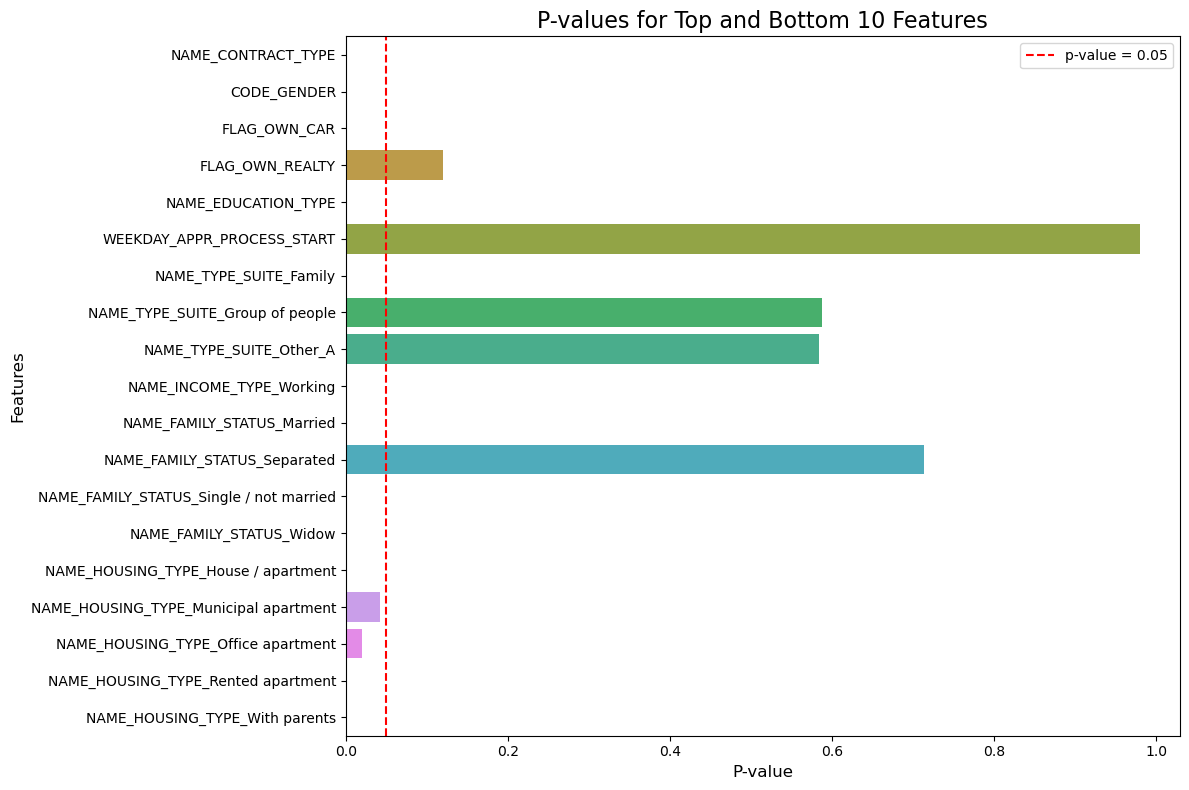

In [78]:
# Ambil 10 fitur dengan p-value terendah dan 10 dengan p-value tertinggi
top_10_low = p_value.head(10)
top_10_high = p_value.tail(10)

# Gabungkan keduanya
plot_data = pd.concat([top_10_low, top_10_high])

# Buat plot
plt.figure(figsize=(12, 8))
sns.barplot(x=plot_data.values, y=plot_data.index, orient='h')

plt.title('P-values for Top and Bottom 10 Features', fontsize=16)
plt.xlabel('P-value', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Tambahkan garis vertikal pada p-value = 0.05 untuk signifikansi
plt.axvline(x=0.05, color='red', linestyle='--', label='p-value = 0.05')

plt.legend()
plt.tight_layout()
plt.show()

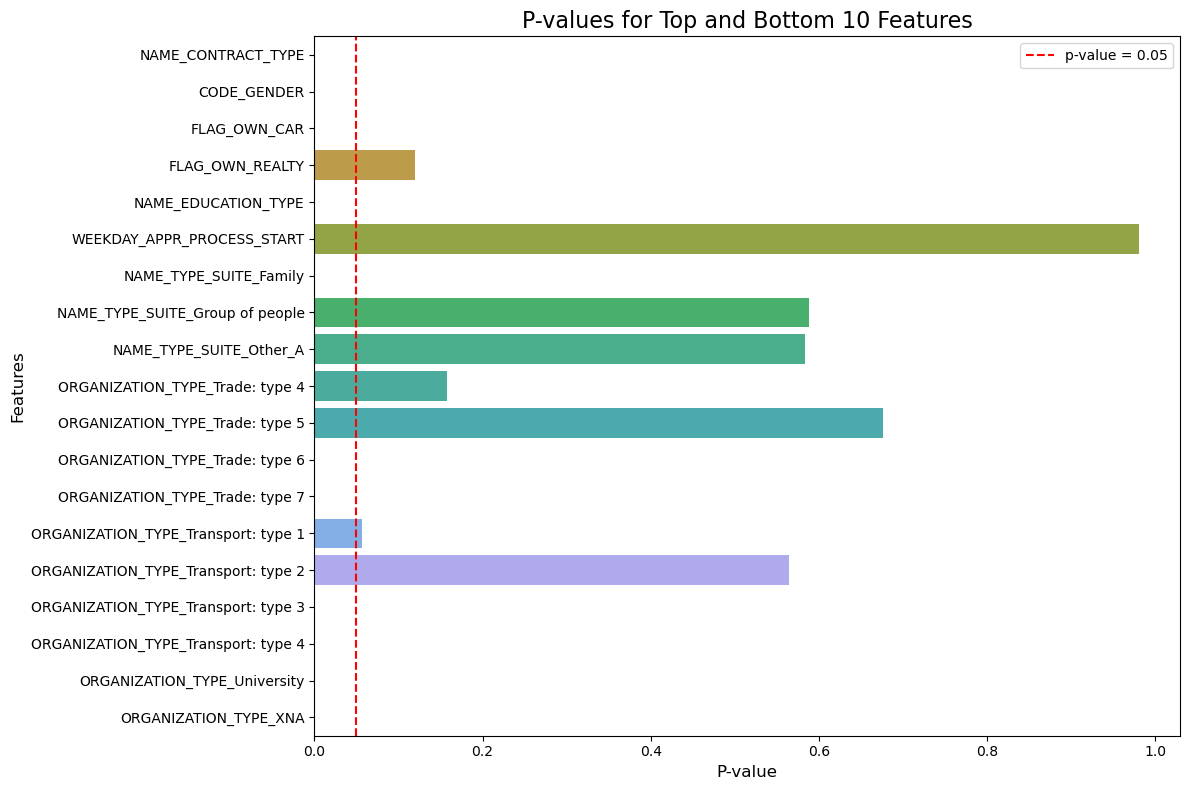

In [211]:
# Ambil 10 fitur dengan p-value terendah dan 10 dengan p-value tertinggi
top_10_low = p_value.head(10)
top_10_high = p_value.tail(10)

# Gabungkan keduanya
plot_data = pd.concat([top_10_low, top_10_high])

# Buat plot
plt.figure(figsize=(12, 8))
sns.barplot(x=plot_data.values, y=plot_data.index, orient='h')

plt.title('P-values for Top and Bottom 10 Features', fontsize=16)
plt.xlabel('P-value', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Tambahkan garis vertikal pada p-value = 0.05 untuk signifikansi
plt.axvline(x=0.05, color='red', linestyle='--', label='p-value = 0.05')

plt.legend()
plt.tight_layout()
plt.show()

# Train Test Split

In [192]:
feature_used_numeric = ['SK_ID_CURR','FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_12',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_10',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_15',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_INCOME_TOTAL',
 'FLAG_DOCUMENT_14',
 'AMT_CREDIT',
 'FLAG_DOCUMENT_13',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_16',
 'CNT_FAM_MEMBERS',
 'AMT_ANNUITY']
feature_used_cat = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']

In [193]:
feature_used = feature_used_numeric + feature_used_cat
X = data_train_prep[feature_used]
y = data_train_prep['TARGET'].values

In [194]:
X

SK_ID_CURR  FLAG_CONT_MOBILE  FLAG_DOCUMENT_5  FLAG_DOCUMENT_12  \
0           100002                 1                0                 0   
1           100003                 1                0                 0   
2           100004                 1                0                 0   
3           100006                 1                0                 0   
4           100007                 1                0                 0   
...            ...               ...              ...               ...   
307506      456251                 1                0                 0   
307507      456252                 1                0                 0   
307508      456253                 1                0                 0   
307509      456254                 1                0                 0   
307510      456255                 1                0                 0   

        FLAG_MOBIL  FLAG_DOCUMENT_7  FLAG_DOCUMENT_19  FLAG_DOCUMENT_10  \
0                1                0                 0                 0   
1                1                0                 0                 0   
2                1                0                 0                 0   
3                1                0                 0                 0   
4                1                0                 0                 0   
...            ...              ...               ...               ...   
307506           1                0                 0                 0   
307507           1                0                 0                 0   
307508           1                0                 0                 0   
307509           1                0                 0                 0   
307510           1                0                 0                 0   

        FLAG_EMAIL  FLAG_DOCUMENT_20  ...  REG_REGION_NOT_WORK_REGION  \
0                0                 0  ...                           0   
1                0                 0  ...                           0   
2                0                 0  ...                           0   
3                0                 0  ...                           0   
4                0                 0  ...                           0   
...            ...               ...  ...                         ...   
307506           0                 0  ...                           0   
307507           0                 0  ...                           0   
307508           1                 0  ...                           0   
307509           0                 0  ...                           0   
307510           0                 0  ...                           0   

        FLAG_DOCUMENT_16  CNT_FAM_MEMBERS  AMT_ANNUITY  NAME_CONTRACT_TYPE  \
0                      0              1.0    -0.003960                   1   
1                      0              2.0     0.961582                   1   
2                      0              1.0    -1.579879                   2   
3                      0              2.0     0.433773                   1   
4                      0              1.0    -0.252852                   1   
...                  ...              ...          ...                 ...   
307506                 0              1.0     0.246907                   1   
307507                 0              1.0    -1.118837                   1   
307508                 0              1.0     0.459452                   1   
307509                 0              2.0    -0.398631                   1   
307510                 0              2.0     2.139669                   1   

        CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  NAME_EDUCATION_TYPE  \
0                 1             2                1                    5   
1                 0             2                2                    4   
2                 1             1                1                    5   
3                 0             2                1                    5   
4                

In [195]:
data_train_prep['TARGET'].value_counts()

TARGET
0    254540
1     23317
Name: count, dtype: int64

In [196]:
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [197]:
X1 = X.copy()
y1 = y.copy()
X2 = X.copy()
y2= y.copy()

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [250]:
X_train.shape

(194499, 37)

In [251]:
X_test.shape

(83358, 37)

In [241]:
import xgboost as xgb

In [200]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate

In [ ]:
X_train, X_test, y_train, y_test

In [202]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model,X,y,cv=5,scoring='roc_auc',return_train_score=True)
    print("roc_auc (crossval test): %.2f" % score['test_score'].mean())
    print("roc_auc (crossval train): %.2f" % score['train_score'].mean())


def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [203]:
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    fig, ax = plt.subplots(1, 1, figsize=(9,6))
    sns.set(font_scale=0.8)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12},
                yticklabels=['No','Yes'], xticklabels=['No','Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix ' + title, fontsize=14)
    plt.show()

## Logistic Regression

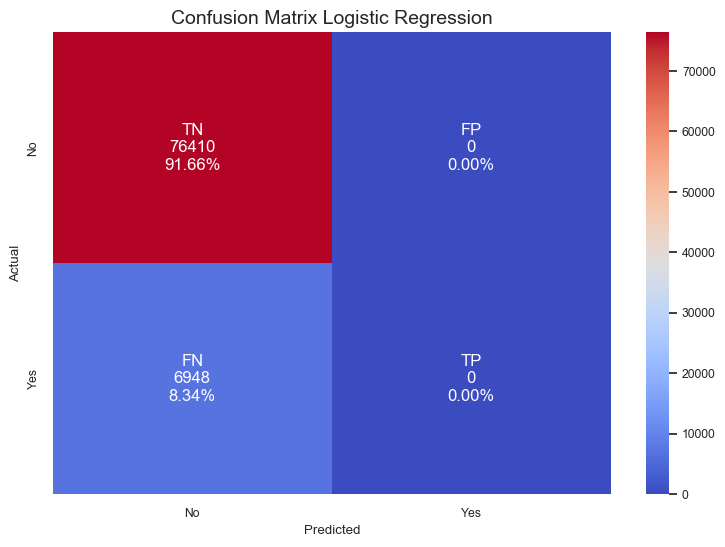

Accuracy (Test Set): 0.92
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.48
roc_auc (train-proba): 0.48
roc_auc (crossval test): 0.48
roc_auc (crossval train): 0.48


<bound method BaseEstimator.get_params of LogisticRegression(random_state=42)>

In [204]:
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train, y_train)

plotting_confusion_matrix(model_LR, X_test, y_test, title='Logistic Regression')
eval_classification(model_LR, X_train, y_train, X_test, y_test)
model_LR.get_params

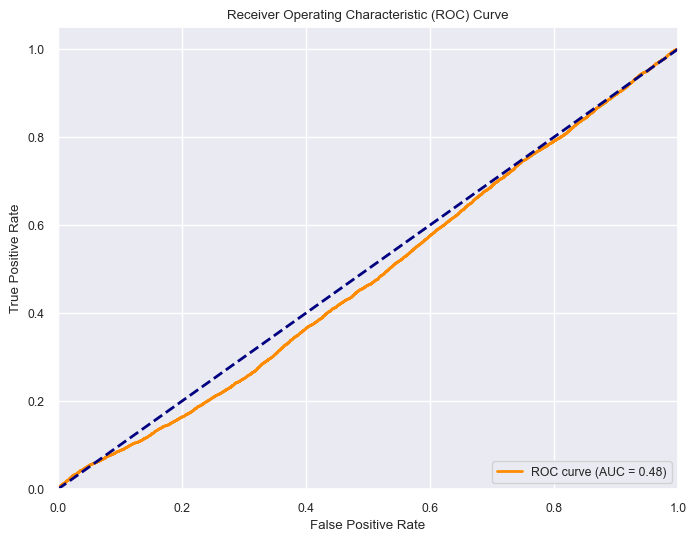

AUC: 0.4788


In [185]:
from sklearn.metrics import roc_curve, auc
# Prediksi probabilitas kelas positif
y_pred_proba = model_LR.predict_proba(X_test)[:, 1]

# Hitung false positive rate, true positive rate, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung AUC
roc_auc = auc(fpr, tpr)

# Buat plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.4f}")

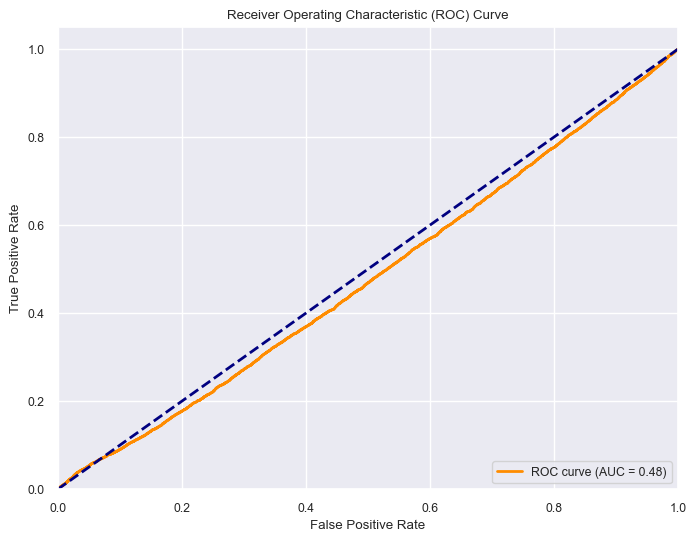

AUC: 0.4781


In [205]:
from sklearn.metrics import roc_curve, auc
# Prediksi probabilitas kelas positif
y_pred_proba = model_LR.predict_proba(X_test)[:, 1]

# Hitung false positive rate, true positive rate, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung AUC
roc_auc = auc(fpr, tpr)

# Buat plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.4f}")

## Random Forest

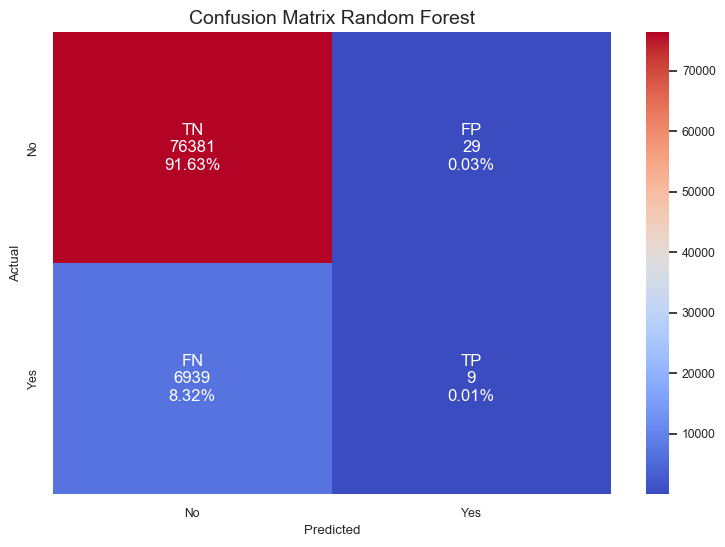

Accuracy (Test Set): 0.92
Precision (Test Set): 0.24
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.58
roc_auc (train-proba): 1.00
roc_auc (crossval test): 0.57
roc_auc (crossval train): 1.00


<bound method BaseEstimator.get_params of RandomForestClassifier(random_state=42)>

In [206]:
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train, y_train)

plotting_confusion_matrix(model_RF, X_test, y_test, title='Random Forest')
eval_classification(model_RF, X_train, y_train, X_test, y_test)
model_RF.get_params

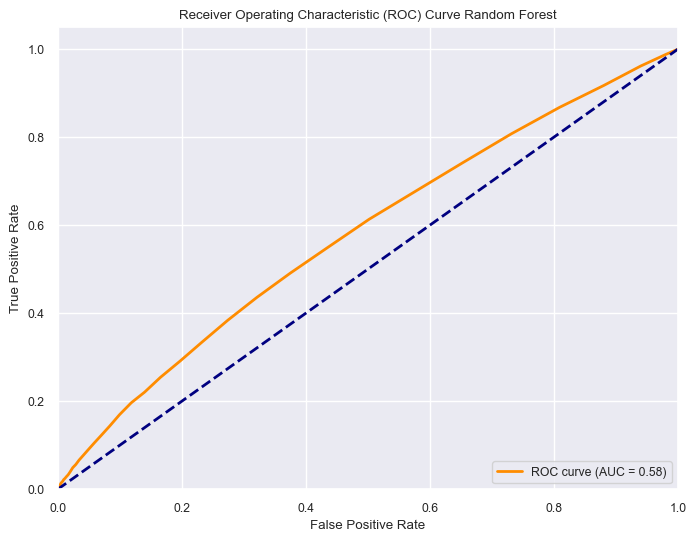

AUC: 0.5785


In [207]:
from sklearn.metrics import roc_curve, auc
# Prediksi probabilitas kelas positif
y_pred_proba = model_RF.predict_proba(X_test)[:, 1]

# Hitung false positive rate, true positive rate, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung AUC
roc_auc = auc(fpr, tpr)

# Buat plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Random Forest')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.4f}")

## Decision Tree

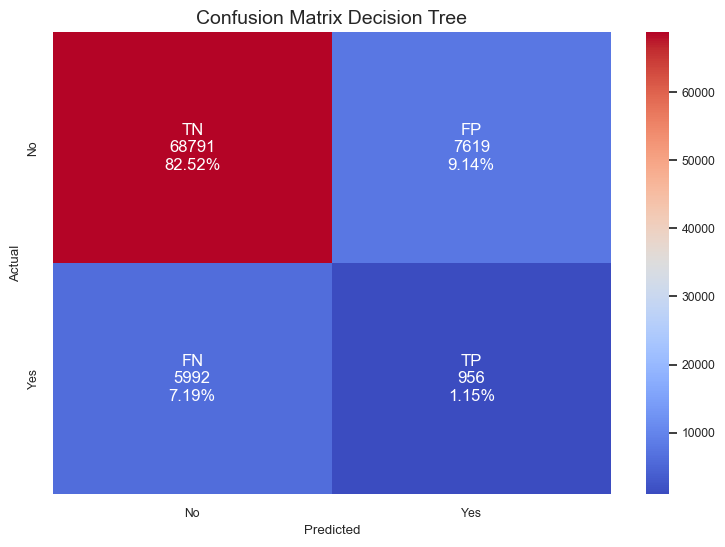

Accuracy (Test Set): 0.84
Precision (Test Set): 0.11
Recall (Test Set): 0.14
F1-Score (Test Set): 0.12
roc_auc (test-proba): 0.52
roc_auc (train-proba): 1.00
roc_auc (crossval test): 0.51
roc_auc (crossval train): 1.00


<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=42)>

In [208]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

plotting_confusion_matrix(model_DT, X_test, y_test, title='Decision Tree')
eval_classification(model_DT, X_train, y_train, X_test, y_test)
model_DT.get_params

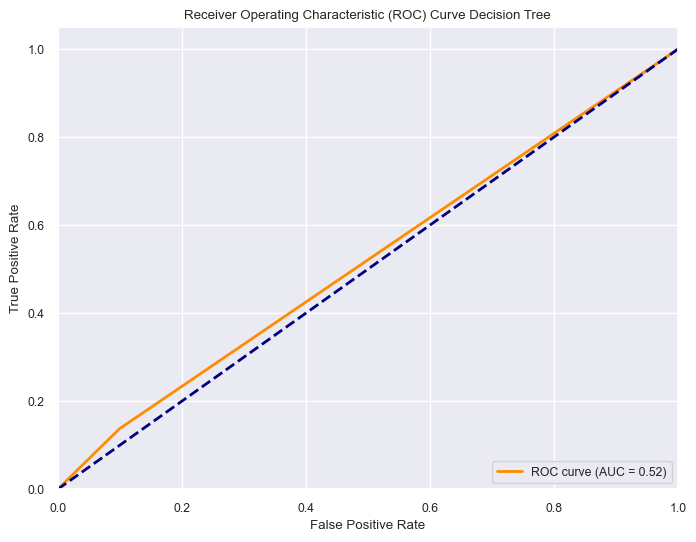

AUC: 0.5189


In [212]:
from sklearn.metrics import roc_curve, auc
# Prediksi probabilitas kelas positif
y_pred_proba = model_DT.predict_proba(X_test)[:, 1]

# Hitung false positive rate, true positive rate, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung AUC
roc_auc = auc(fpr, tpr)

# Buat plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Decision Tree')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.4f}")

## XgBoost

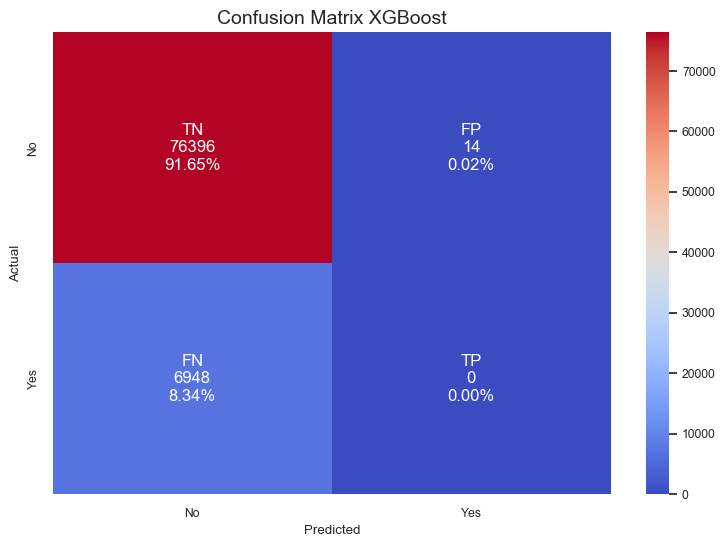

Accuracy (Test Set): 0.92
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.64
roc_auc (train-proba): 0.77
roc_auc (crossval test): 0.59
roc_auc (crossval train): 0.75


<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)>

In [210]:
model_XGB = XGBClassifier(random_state=42)
model_XGB.fit(X_train, y_train)

plotting_confusion_matrix(model_XGB, X_test, y_test, title='XGBoost')
eval_classification(model_XGB, X_train, y_train, X_test, y_test)
model_XGB.get_params

### Tuning Hyperparam

In [246]:
params = {
    'n_estimators': [1, 2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 2, 3, 5]
}

model_Xgb_H = XGBClassifier(random_state=42)
model_Xgb_H = XGBClassifier(random_state=42, class_weight='balanced')
kfold11 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model_Xgb_H, param_grid = params, scoring = 'recall', cv = kfold11)
grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 1}


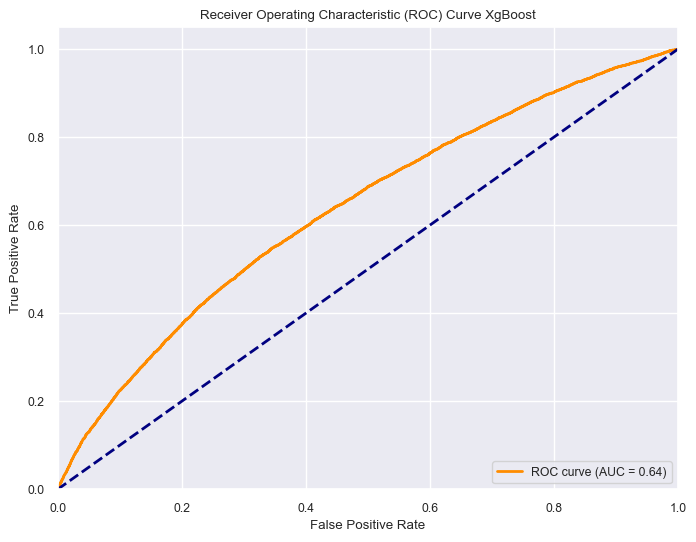

AUC: 0.6359


In [211]:
from sklearn.metrics import roc_curve, auc
# Prediksi probabilitas kelas positif
y_pred_proba = model_XGB.predict_proba(X_test)[:, 1]

# Hitung false positive rate, true positive rate, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung AUC
roc_auc = auc(fpr, tpr)

# Buat plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve XgBoost')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.4f}")

# Feature Importance

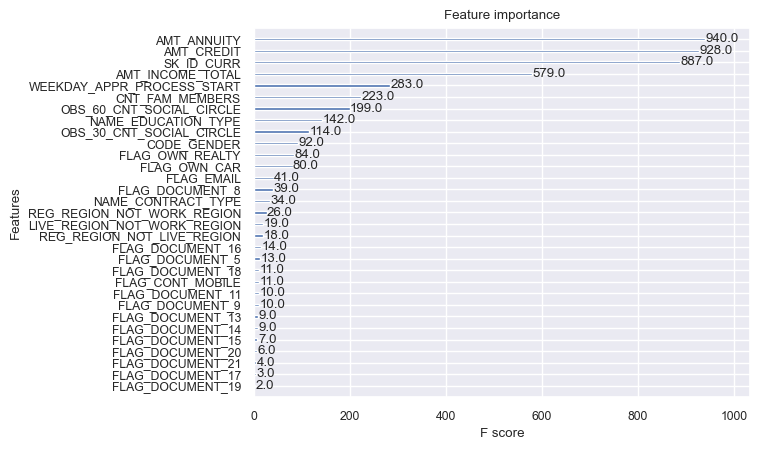

In [242]:
# Plot feature importances
xgb.plot_importance(model_XGB)
plt.show()

# Testing

In [214]:
# read your data
app_test = pd.read_csv('application_test.csv')

In [249]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [215]:
app_test

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             450000.0  ...                0                0   
1             180000.0  ...                0                0   
2             630000.0  ...                0                0   
3            1575000.0  ...                0                0   
4             625500.0  ...                0                0   
...                ...  ...              ...              ...   
48739         270000.0  ...                0                0   
48740         495000.0  ...                0                0   
48741         315000.0  ...                0                0   
48742         450000.0  ...                0                0   
48743         270000.0  ...                0                0   

      FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                    0                0                        0.0   
1                    0                0                        0.0   
2                    0                0                        0.0   
3                    0                0                        0.0   
4                    0                0                        NaN   
...                ...              ...                        ...   
48739                0                0                        0.0   
48740                0                0                        NaN   
48741                0                0                        0.0   
48742                0                0                        0.0   
48743                0                0                        0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            NaN                         NaN   
...                          ...                         ...   
48739                        0.0                         0.0   
48740                        NaN                         NaN   
48741                        0.0           

In [222]:
feature_test_numeric = ['SK_ID_CURR','FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_12',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_10',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_15',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_INCOME_TOTAL',
 'FLAG_DOCUMENT_14',
 'AMT_CREDIT',
 'FLAG_DOCUMENT_13',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_16',
 'CNT_FAM_MEMBERS',
 'AMT_ANNUITY']
feature_test_cat = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']

In [223]:
feature_test = feature_test_numeric + feature_test_cat
app_test_used = app_test[feature_test]

In [224]:
app_test_used

SK_ID_CURR  FLAG_CONT_MOBILE  FLAG_DOCUMENT_5  FLAG_DOCUMENT_12  \
0          100001                 1                0                 0   
1          100005                 1                0                 0   
2          100013                 1                0                 0   
3          100028                 1                0                 0   
4          100038                 1                0                 0   
...           ...               ...              ...               ...   
48739      456221                 1                1                 0   
48740      456222                 1                0                 0   
48741      456223                 1                0                 0   
48742      456224                 1                0                 0   
48743      456250                 1                0                 0   

       FLAG_MOBIL  FLAG_DOCUMENT_7  FLAG_DOCUMENT_19  FLAG_DOCUMENT_10  \
0               1                0                 0                 0   
1               1                0                 0                 0   
2               1                0                 0                 0   
3               1                0                 0                 0   
4               1                0                 0                 0   
...           ...              ...               ...               ...   
48739           1                0                 0                 0   
48740           1                0                 0                 0   
48741           1                0                 0                 0   
48742           1                0                 0                 0   
48743           1                0                 0                 0   

       FLAG_EMAIL  FLAG_DOCUMENT_20  ...  REG_REGION_NOT_WORK_REGION  \
0               1                 0  ...                           0   
1               0                 0  ...                           0   
2               0                 0  ...                           0   
3               0                 0  ...                           0   
4               0                 0  ...                           0   
...           ...               ...  ...                         ...   
48739           0                 0  ...                           0   
48740           0                 0  ...                           0   
48741           0                 0  ...                           0   
48742           0                 0  ...                           1   
48743           0                 0  ...                           0   

       FLAG_DOCUMENT_16  CNT_FAM_MEMBERS  AMT_ANNUITY  NAME_CONTRACT_TYPE  \
0                     0              2.0      20560.5          Cash loans   
1                     0              2.0      17370.0          Cash loans   
2                     0              2.0      69777.0          Cash loans   
3                     0              4.0      49018.5          Cash loans   
4                     0              3.0      32067.0          Cash loans   
...                 ...              ...          ...                 ...   
48739                 0              1.0      17473.5          Cash loans   
48740                 0              4.0      31909.5          Cash loans   
48741                 0              3.0      33205.5          Cash loans   
48742                 0              2.0      25128.0          Cash loans   
48743                 0              2.0      24709.5          Cash loans   

       CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                F             N                Y   
1                M             N                Y   
2                M             Y                Y   
3                F             N                Y   
4                M             Y                N   
...            ...           ...              ...   
48739            F             N                Y   
48740          

## labeling

In [225]:
# Label encoding
# mapping

mapping_contract_type = {
    'Cash loans' : 1,
    'Revolving loans' : 2
}

mapping_gender = {
    'F' : 0,
    'M' : 1,
    'XNA': 2
}

mapping_own_car = {
    'Y' : 1,
    'N' : 2
}

mapping_own_realty = {
    'Y' : 1,
    'N' : 2
}

mapping_education = {
    'Academic degree' : 1,
    'Lower secondary' : 2,
    'Incomplete higher' : 3,
    'Higher education' : 4,
    'Secondary / secondary special' : 5
}

mapping_weekday_proces_start = {
    'MONDAY' : 1,
    'TUESDAY' : 2,
    'WEDNESDAY' : 3,
    'THURSDAY' : 4,
    'FRIDAY' : 5,
    'SATURDAY' : 6,
    'SUNDAY' : 7
}


app_test_used['NAME_CONTRACT_TYPE'] = app_test_used['NAME_CONTRACT_TYPE'].map(mapping_contract_type)

app_test_used['CODE_GENDER'] = app_test_used['CODE_GENDER'].map(mapping_gender)

app_test_used['FLAG_OWN_CAR'] = app_test_used['FLAG_OWN_CAR'].map(mapping_own_car)

app_test_used['FLAG_OWN_REALTY'] = app_test_used['FLAG_OWN_REALTY'].map(mapping_own_realty)

app_test_used['NAME_EDUCATION_TYPE'] = app_test_used['NAME_EDUCATION_TYPE'].map(mapping_education)

app_test_used['WEEKDAY_APPR_PROCESS_START'] = app_test_used['WEEKDAY_APPR_PROCESS_START'].map(mapping_weekday_proces_start)

In [226]:
app_test_used

SK_ID_CURR  FLAG_CONT_MOBILE  FLAG_DOCUMENT_5  FLAG_DOCUMENT_12  \
0          100001                 1                0                 0   
1          100005                 1                0                 0   
2          100013                 1                0                 0   
3          100028                 1                0                 0   
4          100038                 1                0                 0   
...           ...               ...              ...               ...   
48739      456221                 1                1                 0   
48740      456222                 1                0                 0   
48741      456223                 1                0                 0   
48742      456224                 1                0                 0   
48743      456250                 1                0                 0   

       FLAG_MOBIL  FLAG_DOCUMENT_7  FLAG_DOCUMENT_19  FLAG_DOCUMENT_10  \
0               1                0                 0                 0   
1               1                0                 0                 0   
2               1                0                 0                 0   
3               1                0                 0                 0   
4               1                0                 0                 0   
...           ...              ...               ...               ...   
48739           1                0                 0                 0   
48740           1                0                 0                 0   
48741           1                0                 0                 0   
48742           1                0                 0                 0   
48743           1                0                 0                 0   

       FLAG_EMAIL  FLAG_DOCUMENT_20  ...  REG_REGION_NOT_WORK_REGION  \
0               1                 0  ...                           0   
1               0                 0  ...                           0   
2               0                 0  ...                           0   
3               0                 0  ...                           0   
4               0                 0  ...                           0   
...           ...               ...  ...                         ...   
48739           0                 0  ...                           0   
48740           0                 0  ...                           0   
48741           0                 0  ...                           0   
48742           0                 0  ...                           1   
48743           0                 0  ...                           0   

       FLAG_DOCUMENT_16  CNT_FAM_MEMBERS  AMT_ANNUITY  NAME_CONTRACT_TYPE  \
0                     0              2.0      20560.5                   1   
1                     0              2.0      17370.0                   1   
2                     0              2.0      69777.0                   1   
3                     0              4.0      49018.5                   1   
4                     0              3.0      32067.0                   1   
...                 ...              ...          ...                 ...   
48739                 0              1.0      17473.5                   1   
48740                 0              4.0      31909.5                   1   
48741                 0              3.0      33205.5                   1   
48742                 0              2.0      25128.0                   1   
48743                 0              2.0      24709.5                   1   

       CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  NAME_EDUCATION_TYPE  \
0                0             2                1                    4   
1                1             2                1                    5   
2                1             1                1                    4   
3                0             2                1                    5   
4                1             1                2                    

## Prediction Data Test

In [227]:
test_prediction = model_XGB.predict(app_test_used)
test_prediction = [ 1 if y>=0.5 else 0 for y in test_prediction]

In [228]:
app_test_pred = pd.DataFrame(test_prediction, columns= ['TARGET'])

In [229]:
new_test = pd.concat([app_test_used, app_test_pred], axis=1, join='inner')

In [230]:
new_test.head()

SK_ID_CURR  FLAG_CONT_MOBILE  FLAG_DOCUMENT_5  FLAG_DOCUMENT_12  \
0      100001                 1                0                 0   
1      100005                 1                0                 0   
2      100013                 1                0                 0   
3      100028                 1                0                 0   
4      100038                 1                0                 0   

   FLAG_MOBIL  FLAG_DOCUMENT_7  FLAG_DOCUMENT_19  FLAG_DOCUMENT_10  \
0           1                0                 0                 0   
1           1                0                 0                 0   
2           1                0                 0                 0   
3           1                0                 0                 0   
4           1                0                 0                 0   

   FLAG_EMAIL  FLAG_DOCUMENT_20  ...  FLAG_DOCUMENT_16  CNT_FAM_MEMBERS  \
0           1                 0  ...                 0              2.0   
1           0                 0  ...                 0              2.0   
2           0                 0  ...                 0              2.0   
3           0                 0  ...                 0              4.0   
4           0                 0  ...                 0              3.0   

   AMT_ANNUITY  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      20560.5                   1            0             2   
1      17370.0                   1            1             2   
2      69777.0                   1            1             1   
3      49018.5                   1            0             2   
4      32067.0                   1            1             1   

   FLAG_OWN_REALTY  NAME_EDUCATION_TYPE  WEEKDAY_APPR_PROCESS_START  TARGET  
0                1                    4                           2       0  
1                1                    5                           5       0  
2                1                    4                           1       0  
3                1                    5                           3       0  
4                2                    5                           5       0  

[5 rows x 38 columns]

In [178]:
predicted = new_test[['SK_ID_CURR' ,'TARGET']]

In [231]:
predicted2 = new_test[['SK_ID_CURR' ,'TARGET']]

In [243]:
predicted2

SK_ID_CURR  TARGET
0          100001       0
1          100005       0
2          100013       0
3          100028       0
4          100038       0
...           ...     ...
48739      456221       0
48740      456222       0
48741      456223       0
48742      456224       0
48743      456250       0

[48744 rows x 2 columns]

In [233]:
new_test['TARGET'].value_counts()

TARGET
0    48631
1      113
Name: count, dtype: int64